In [2]:
import uproot
import sys
import glob
import os
import struct
import time
import csv
import pickle
import math
import gc
import pandas as pd
# import sympy

from IPython.core.display import display, HTML, Image

import numpy             as np
import matplotlib.pyplot as plt

import scipy
from   scipy             import interpolate
from   scipy.interpolate import CubicSpline, splev, splrep, interp1d, PPoly
from   scipy.optimize    import curve_fit, least_squares, minimize
from   scipy.signal      import find_peaks

import matplotlib             as mpl
import matplotlib.pyplot      as plt

#Plotting Config
mpl.style.use("default")
mpl.rcParams["axes.facecolor"] = "#EAEAF2" 
mpl.rcParams['figure.dpi']     = 100 
mpl.rcParams['savefig.dpi']    = 100 

C:\Users\musta\AppData\Local\Temp\ipykernel_5696\2210132131.py:14: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Image


# Tips 

###### Fit -  "ValueError: `x0` is infeasible" - error from scipy curve_fit

In [ ]:
"""
-This error occurs when initial guesses exceeds outside of the set bounds
"""

###### Fitting RULES summary

In [ ]:
"""
1. DOF better be same (or less) as the space that you are fitting
    -in 2d space, limit your free parameters to 2.
    
2. Set bin width of the original data distribution to be less than standard deviation of
   the peak you are trying to fit.
   
3. Add a constant term in the fit function to represent a pedestal

6. Fine-tune the fitting by altering fixed constants

6. Fine-tune the fitting by altering initial guesses + bounds!!!
    -bound must contin initial guesses
    
6. Fine-tune the fitting by altering bin size (i.e. # of bins)
    
6. Fine-tune the fitting by altering fitting rage    
    
7. Increase the number of iterations that curve_fit tries
    -curve_fit(maxfev=10000)
    
8. When fitting severely non-linear distribution, mix poly + gaussian and find-tune bounds

"""

###### Fit - Increase number of iterations

In [ ]:
popt, pcov = optimize.curve_fit(func, t1, F1, maxfev=10000)

###### Fit - Estimate initial parameter

In [15]:
#Generate Fake Data
data  = np.random.exponential(scale=2.0, size=100000)
data2 = np.random.normal(loc=3.0, scale=0.3, size=15000)

#Bins
bins  = np.arange(0, 6.1, 0.1)

#Cetner of each bins - Final x data
bin_centers = np.array([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])

#array of occurances + corresponding bins
data_entries_1, bins = np.histogram(data, bins=bins)
data_entries_2, bins = np.histogram(data2, bins=bins)

#Add two generated histograms - Final y data
data_entries = data_entries_1 + data_entries_2

In [16]:
#Define function
def fit_func(x, A, beta, B, mu, sigma):
    
    #Define functions here
    first_func  = A*np.exp(-x/beta)
    second_func = B*np.exp(-1.0*(x - mu)**2 / (2*sigma**2))
    final_func  = first_func + second_func
    
    return final_func

In [17]:


#Fit the function to the histogram data
#    -popt  = fit results for the parameter
#    -pconv = covariance matrix: the diagonal elements of which represent the variance of the fitted parameters

"""
-p0 = rough estimates for the fit parameters
    = 1st (A) = ESTIMATE OF MAX of the function
    = 2nd     = beta
    = 3rd (B) = ESTIMATE OF MAX of the function
    = 4th     = mean of second fn
    = 5th     = stddev

"""

popt, pconv = curve_fit(fit_func, xdata=bin_centers, ydata=data_entries, p0=[20000, 2.0, 2000, 3.0, 0.3])

#Coefficients
print(popt)

[4.99261609e+03 2.00723354e+00 1.98578980e+03 2.99849333e+00
 2.97517275e-01]


###### Fit - Set bounds for paramters 

In [ ]:
#Make the fit (MUST)
popt, pconv = curve_fit(fit_buta, xdata=bin_centers, ydata=hist_buta, \
                        p0=[num_buta, peak_buta, stddev_buta, 6],
                        #Set bounds
                        bounds=([0,                   peak_buta - stddev_buta, 0,             4.], \
                                [3*len(butanol_data), peak_buta + stddev_buta, 3*stddev_buta, 8.])) 

###### Fit - curve_fit() Contraint on number of fitting iterations 

In [ ]:
params, pcov = curve_fit(fit_func_combined, xdata=mids_fit, ydata=hist_bf_fit, p0=guess, bounds=bounds, \
                         maxfev=3000)

###### NUMPY Histogram - Make Histogram Objects + Mean & Stddev  & Mode

In [ ]:
#Generate Data
x = np.random.normal(loc=3.0, scale=0.3, size=15000)

#Before partitioned into histogram bins
print(x.mean())
print(x.var())
print(x.std())

In [ ]:
#Generate histogram
hist, bins = np.histogram(x, bins='fd')
hist2, bins = np.histogram(x, bins='fd')


# #For Dataframes into Histograms
# carbon_data      = np.array(df["mmsq_pi0"])
# hist_carb1, bins = np.histogram(carbon_data, bins="fd")

#Midpoints of the bins
mids = 0.5*(bins[1:] + bins[:-1])
mids = np.array([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])
mids = [0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)]

#Mean, Var, Stddv
mean   = np.average(mids, weights=hist)
var    = np.average((mids - mean)**2, weights=hist)
stddev = np.sqrt(var) 

#Max bin - mode
mode = bins[np.argmax(hist)]

print("mode   = ", mode)
print("mean   = ", mean)
print("var    = ", var)
print("stddev = ", stddev)

In [ ]:
#Plot initial data
plt.hist(x, bins=100)
plt.show()

In [ ]:
#Histogramming histogram
plt.bar(mids, hist, width=mids[1] - mids[0])
plt.show()

###### NUMPY Histogram - Find bins + New histogram  + mean + stddev from df

In [ ]:
#========================================================================================================
#Histogram for MMSQ
buta_data = np.array(df_buta_Eg_cos["el_pc_mmsq_pi0"])
carb_data = np.array(df_carb_Eg_cos["el_pc_mmsq_pi0"])
buta_mmsq_hist, buta_bins = np.histogram(buta_data, bins="fd")
carb_mmsq_hist, carb_bins = np.histogram(carb_data, bins=buta_bins)

#Find Peak of Butanol
peak = buta_bins[np.argmax(buta_mmsq_hist)]

#Find stddev of Butanol
mids   = 0.5*(buta_bins[:-1] + buta_bins[1:])
mean   = np.average(mids, weights=buta_mmsq_hist)
var    = np.average((mids - mean)**2, weights=buta_mmsq_hist)
stddev = np.sqrt(var)

#=====================================================================================================
#Find ranges of mmsq: [\sigma, 2*\sigma] with Butanol
range_list = [peak + sf_select_range[0]*stddev, peak + sf_select_range[1]*stddev]
#             range_list_low = [peak + sf_select_range_low[0]*stddev, peak + sf_select_range_low[1]*stddev]
#             range_list_up  = [peak + sf_select_range_up[0]*stddev, peak + sf_select_range_up[1]*stddev]

#Make New Histogram within defined ranges above: Events within [\sigma, 2*\sigma]
n_b_i, buta_select_bins = np.histogram(buta_data[(buta_data>=range_list[0]) & (buta_data<=range_list[1])],\
                                                            bins="fd")
n_c_i, carb_select_bins = np.histogram(carb_data[(carb_data>=range_list[0]) & (carb_data<=range_list[1])], \
                                                            bins=buta_select_bins)
#             n_b_i, buta_select_bins = np.histogram(buta_data[((buta_data>=range_list_low[0]) & (buta_data<=range_list_low[1])) | \
#                                                              ((buta_data>=range_list_up[0])  & (buta_data<=range_list_up[1]))], \
#                                                    bins="fd")
#             n_c_i, carb_select_bins = np.histogram(carb_data[((carb_data>=range_list_low[0]) & (carb_data<=range_list_low[1])) | \
#                                                              ((carb_data>=range_list_up[0])  & (carb_data<=range_list_up[1]))], \
#                                                    bins=buta_select_bins)

###### NUMPY Histogram - Add Histograms 

In [2]:
data  = np.random.exponential(scale=2.0, size=100000)
data2 = np.random.normal(loc=3.0, scale=0.3, size=15000)

bins  = np.arange(0, 6.1, 0.1)

#array of occurances + corresponding bins
data_entries_1, bins_1 = np.histogram(data, bins=bins)
data_entries_2, bins_2 = np.histogram(data2, bins=bins)

#Add two generated histograms - Final y data
data_entries = data_entries_1 + data_entries_2

###### NUMPY Histogram - Create new hist from subset of original hist

In [51]:
data  = np.random.exponential(scale=2.0, size=100000)
data2 = np.random.normal(loc=3.0, scale=0.3, size=15000)

bins  = np.arange(0, 6.1, 0.1)

#array of occurances + corresponding bins
data_entries_1, bins_1 = np.histogram(data, bins=bins)
data_entries_2, bins_2 = np.histogram(data2, bins=bins)

#Add two generated histograms - Final y data
data_entries = data_entries_1 + data_entries_2

bin_centers = np.array([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])

<BarContainer object of 60 artists>

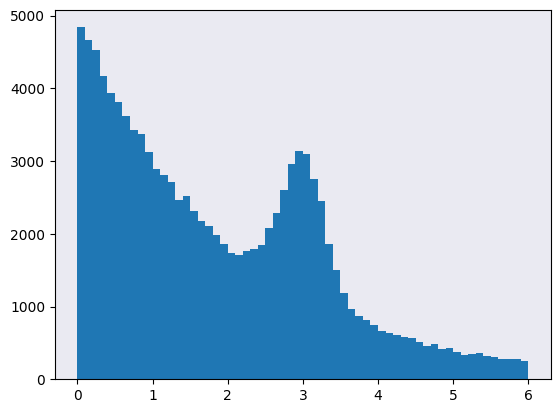

In [52]:
plt.bar(bin_centers, data_entries, width=bin_centers[1]-bin_centers[0])

<BarContainer object of 20 artists>

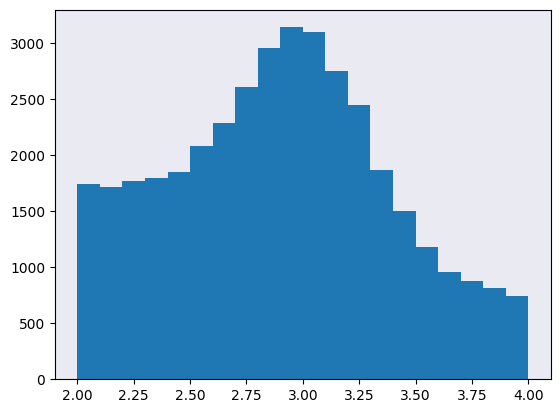

In [53]:
#Newly created bin - subset of original bins
bin_new = bin_centers[(bin_centers>2) & (bin_centers<4)]

#Newly created hist - subset of original hist
hist_new = data_entries[(bin_centers>2) & (bin_centers<4)]

#Plot subset of hist
plt.bar(bin_new, hist_new, width=bin_new[1]-bin_new[0])

In [ ]:
bin_centers[(bin_centers>2) & (bin_centers<4)]

In [ ]:
(bin_centers>2) & (bin_centers<4)

In [ ]:
data_entries[(bin_centers>2) & (bin_centers<4)]

###### Finding Optimal Bin Size 

* Bin width:
    $$ h = \frac{max~x - min~x}{k} $$

* Square-root choice:
    $$  k = Bin~Numbers =  CONSTANT \times \sqrt{data~numbers}$$

* Freedman Diaconis 
    $$ h = 2\frac{IQR(x)}{n^{1/3}} $$
    * IQE = Interquartile Range
    * n = # of data points
    
* Sturge's Rule - Good for normal distribution
    * k = 1 + 3.322 log(N)
        * where k = # of bins, N = # of data points, log is of base 10
    * k = 1 + log_2(N)
        * log of base 2
* Scott's Rule
    * h = 3.49 * \sigma * n^(-1/3)

In [ ]:
#Freedman Diaconis Binning

#Data1
carbon_data1 = np.array(carb_dict["Eg_000.700"][2]["mmsq_pi0"])

#hist_carbogram
#    -Useing Freedman Diaconis binning
hist_carb1, bins = np.histogram(carbon_data1, bins="fd")

#Evaluate at the center of bins
bin_centers = np.array([0.5*(bins[j] + bins[j+1]) for j in range(len(bins)-1)])

###### Percentile Calculation 

1. Order all the values in the data set from smallest to largest.
2. Multiply k percent by the total number of values, n.
3. If the index obtained in Step 2 is not a whole number, round it up to the nearest whole number and go to Step 4a. If the index obtained in Step 2 is a whole number, go to Step 4b.
4. 4a.Count the values in your data set from left to right (from the smallest to the largest value) until you reach the number indicated by Step 3.
5. 4b.Count the values in your data set from left to right until you reach the number indicated by Step 2. The kth percentile is the average of that corresponding value in your data set and the value that directly follows it.

In [ ]:
#Wanted percentiles
bin_partition_perc  = [0.15, 0.25]

#tolist() only works for Series
#    -for dataframes, just use iloc[0]
bin_pos_eg_cos_list = df_buta_Eg_cos["mmsq_pi0"].quantile(bin_partition_perc).tolist()

bin_pos_eg_cos_list = [round(i, 3) for i in bin_pos_eg_cos_list]

In [ ]:
df = pd.DataFrame(np.array([[1, 1], [2, 10], [3, 100], [4, 100]]), columns=['a', 'b'])
df

In [ ]:
df.quantile(.1)

In [ ]:
df.quantile([.1, .5])

# Splines Interpolation 

###### Simple Interpolation 

In [8]:
x    = np.linspace(0, 10, num=11, endpoint=True)
xnew = np.linspace(0, 10, num=41, endpoint=True)

y  = np.cos(-x**2/9.0)
f  = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

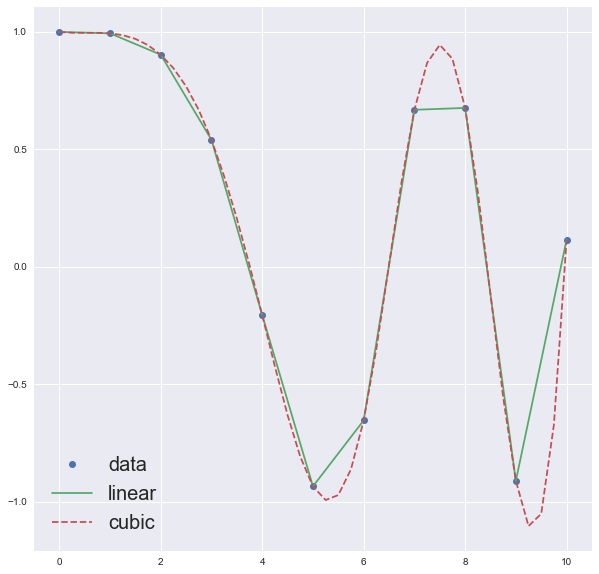

In [13]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best', fontsize=20)
plt.show()

###### Interpolation Example 2 

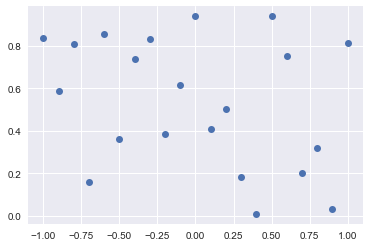

In [2]:
# Original "data set" --- 21 random numbers between 0 and 1.
x0 = np.linspace(-1,1,21)
y0 = np.random.random(21)
plt.plot(x0, y0, 'o', label='Data')

In [3]:
# Array with points in between those of the data set for interpolation.
x = np.linspace(-1,1,101)

In [4]:
# Available options for interp1d
options = ('quadratic', 'cubic')
# options = ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic')

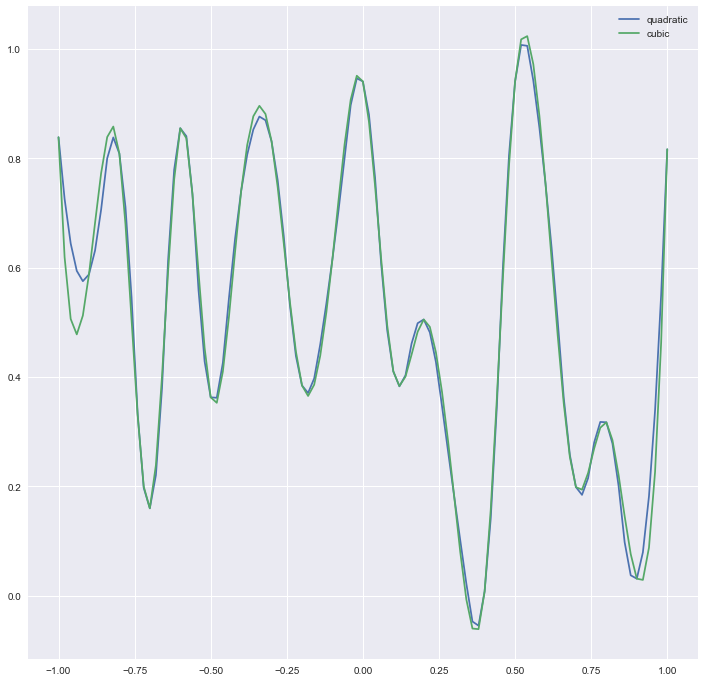

In [5]:
plt.figure(figsize=(12, 12))

for o in options:
    f = interp1d(x0, y0, kind=o)    # interpolation function
    plt.plot(x, f(x), label=o)      # plot of interpolated data

plt.legend()
plt.show()

###### Splines Interpolation (BEST)

* `scipy.iterpolate.splrep`
    * FInd the B-spline representaion of 1-D curve
    * Given the set of data points (x[i], y[i]), determine a smooth spline approximation of degree __k__ 
      on the interval xb <= x <= e
    * Output (t, c, k) tuple = knot points t, coefficients c, order k

In [10]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)

#Splines Interpolqtion
spl_fn  = interpolate.splrep(x, y, k=3)
xnew    = np.arange(0, 2*np.pi, np.pi/50)
ynew    = interpolate.splev(xnew, spl_fn, der=0)

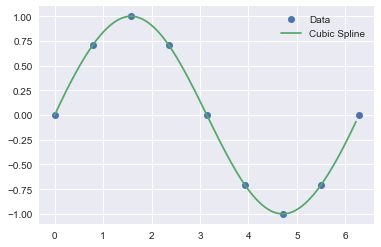

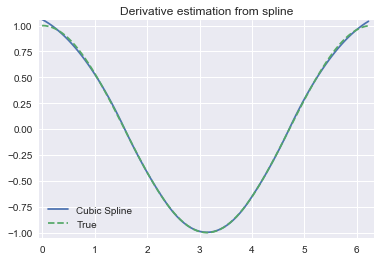

In [41]:
#Splines Interpolation plot
plt.figure()
plt.plot(x, y, 'o', xnew, ynew)
plt.legend(['Data', 'Cubic Spline'])
plt.show()

#Derivative of spline interpolation
yder = interpolate.splev(xnew, spl_fn, der=1)
plt.figure()
plt.plot(xnew, yder, xnew, np.cos(xnew),'--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Derivative estimation from spline')
plt.show()

###### Splines Interpolation Example 2 

In [ ]:
#Data1
carbon_data1     = np.array(carb_dict["Eg_000.300"][5]["mmsq_pi0"])

#hist_carbogram
hist_carb1, bins = np.histogram(carbon_data1, bins="fd")

#Define knot positions
#    -Start from 2.5%, 5%, not 10% 
xpos_partition_perc  = [i/10 for i in range(1, 11, 1)]
initial   = [0.05/(2**5), 0.05/(2**4), 0.05/(2**3), 0.05/(2**2), 0.05/2, 0.05]
xpos_partition_perc  = initial + xpos_partition_perc
knot_pos             = carb_dict["Eg_000.300"][5]["mmsq_pi0"].quantile(xpos_partition_perc).tolist()

#In which bin, does the knows reside
knot_bin_pos = []
for i in range(len(knot_pos)):
    for j in range(len(bins)-1):
        if (knot_pos[i] >= bins[j] and knot_pos[i] <= bins[j+1]):
            knot_bin_pos.append(j)

#Y-value (counts) of knot positions
y = hist_carb1[knot_bin_pos]

#Splines Function
spl_fn = scipy.interpolate.splrep(knot_pos, y, k=2)

#Evaluate define Splines function at MORE x positions
xnew_perc = [i/20 for i in range(1, 21, 1)]
initial   = [0.05/(2**5), 0.05/(2**4), 0.05/(2**3), 0.05/(2**2), 0.05/2, 0.05]
xnew_perc = initial + xnew_perc
xnew      = carb_dict["Eg_000.300"][5]["mmsq_pi0"].quantile(xnew_perc).tolist()

#Evaluate xnew at defined splines function
ynew      = scipy.interpolate.splev(xnew, spl_fn) 

In [ ]:
plt.figure(figsize=(12, 12))

plt.hist(carb_dict["Eg_000.700"][2]["mmsq_pi0"], bins=bins, label="carbon", color="#55A868", alpha=0.5, range=(-0.8, 0.4))
plt.hist(buta_dict["Eg_000.700"][2]["mmsq_pi0"], bins=bins, label="butanol", color="#4C72B0", alpha=0.5, range=(-0.8, 0.4))

plt.plot(xnew, ynew, linewidth=2.5, label="SPL")

plt.legend()
plt.show()

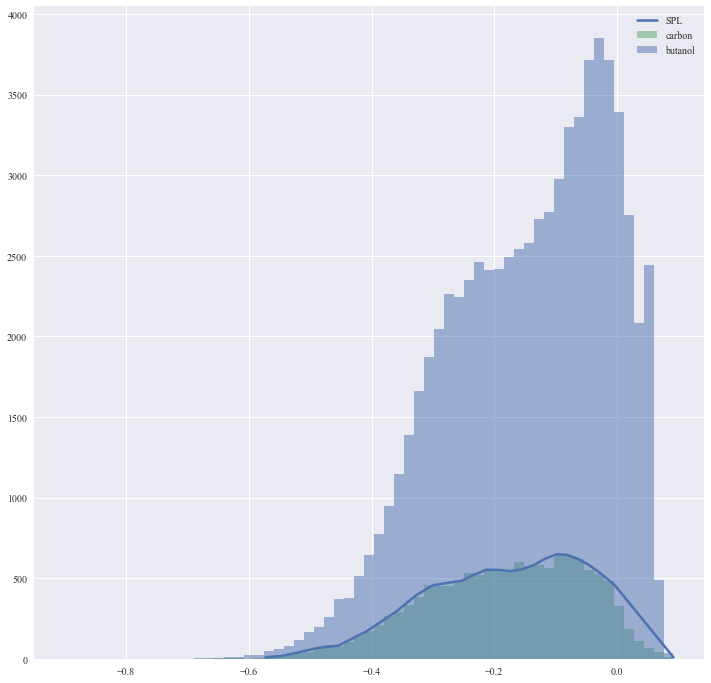

In [15]:
Image(filename="spl_int.png")

###### Piecewise Polynomial (PPoly) from returns of splev 

* scipy.interpolate.PPoly(c, x, extrapolate=None, axis=0)
    * Piecewise polynomial in terms of coefficients and breakpoints. 
* PPoly.from_spline(tck, extrapolate=None)
    * tck = returns from splrep()
#======================================================================================================
* The polynomial between x[i] and x[i + 1] is written in the local power basis:
* `S = sum(c[m, i] * (xp - x[i])**(k-m) for m in range(k+1))`
* c[k, m]
    * c[0, 0] = coefficient of x^3 of 1st interval 
    * c[1, 0] = coefficient of x^2 of 1st interval
    * ...
* c[k, m].transpose() = c[m, k]
    * c[0, k] = [x3 coff, x2 coff, x1 coff, const] of interval 1
* Breakpoints for polynomials are `DIFFERENT` than actual x_i points
* When reconstructing polynomials from coefficients, use `BREAKPOINTS` to define intervals, not x_i

In [3]:
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)

spl_fn  = interpolate.splrep(x, y, k=3)
xnew    = np.arange(0, 2*np.pi, np.pi/50)
ynew    = interpolate.splev(xnew, spl_fn, der=0)

In [4]:
#PPoly object
pp              = PPoly.from_spline(spl_fn)
 
#coefficients for each intervals
coefficients    = pp.c.transpose()

#polynomials breakpoints
pp_break_points = pp.x

In [5]:
coefficients

array([[-8.49384540e-02, -1.35617350e-01,  1.05922424e+00,
         3.44265545e-18],
       [-8.49384540e-02, -1.35617350e-01,  1.05922424e+00,
         3.44265545e-18],
       [-8.49384540e-02, -1.35617350e-01,  1.05922424e+00,
         3.44265545e-18],
       [-8.49384540e-02, -1.35617350e-01,  1.05922424e+00,
         3.44265545e-18],
       [ 7.05490062e-02, -5.35880385e-01,  4.43806740e-03,
         1.00000000e+00],
       [ 1.56885693e-01, -3.69653205e-01, -7.06766351e-01,
         7.07106781e-01],
       [ 1.56885693e-01, -4.24073958e-16, -9.97091299e-01,
         1.94289029e-16],
       [ 7.05490062e-02,  3.69653205e-01, -7.06766351e-01,
        -7.07106781e-01],
       [-8.49384540e-02,  5.35880385e-01,  4.43806740e-03,
        -1.00000000e+00],
       [-8.49384540e-02,  1.35617350e-01,  1.05922424e+00,
        -2.44929360e-16],
       [-8.49384540e-02,  1.35617350e-01,  1.05922424e+00,
        -2.44929360e-16],
       [-8.49384540e-02,  1.35617350e-01,  1.05922424e+00,
      

In [6]:
pp_break_points

array([0.        , 0.        , 0.        , 0.        , 1.57079633,
       2.35619449, 3.14159265, 3.92699082, 4.71238898, 6.28318531,
       6.28318531, 6.28318531, 6.28318531])

In [7]:
x

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714, 6.28318531])

In [8]:
len(pp_break_points)

13

In [9]:
len(x)

9

###### Piecewise Polynomial (PPoly) from returns of splev Example 2

* c[k, m]
    * c[0, 0] = coefficient of x^3 of 1st interval 
    * c[1, 0] = coefficient of x^2 of 1st interval
    * ...

In [11]:
# calculate 5 natural cubic spline polynomials for 6 points
# (x,y) = (0,12) (1,14) (2,22) (3,39) (4,58) (5,77)
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([12,14,22,39,58,77])

In [12]:
# calculate natural cubic spline polynomials
cs = CubicSpline(x,y,bc_type='natural')

In [13]:
# show values of interpolation function at x=1.25
print('S(1.25) = ', cs(1.25))

S(1.25) =  15.203125


In [14]:
## Aditional - find polynomial coefficients for different x regions

# if you want to print polynomial coefficients in form
# S0(0<=x<=1) = a0 + b0(x-x0) + c0(x-x0)^2 + d0(x-x0)^3
# S1(1< x<=2) = a1 + b1(x-x1) + c1(x-x1)^2 + d1(x-x1)^3
# ...
# S4(4< x<=5) = a4 + b4(x-x4) + c5(x-x4)^2 + d5(x-x4)^3
# x0 = 0; x1 = 1; x4 = 4; (start of x region interval)

In [15]:
# show values of a0, b0, c0, d0, a1, b1, c1, d1 ...
cs.c

array([[ 1.00000000e+00,  1.00000000e+00, -2.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-2.22044605e-16,  3.00000000e+00,  6.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  4.00000000e+00,  1.30000000e+01,
         1.90000000e+01,  1.90000000e+01],
       [ 1.20000000e+01,  1.40000000e+01,  2.20000000e+01,
         3.90000000e+01,  5.80000000e+01]])

In [16]:
# Polynomial coefficients for 0 <= x <= 1
a0 = cs.c.item(3,0)
b0 = cs.c.item(2,0)
c0 = cs.c.item(1,0)
d0 = cs.c.item(0,0)

In [17]:
# Polynomial coefficients for 1 < x <= 2
a1 = cs.c.item(3,1)
b1 = cs.c.item(2,1)
c1 = cs.c.item(1,1)
d1 = cs.c.item(0,1)

In [18]:
# Polynomial coefficients for 4 < x <= 5
a4 = cs.c.item(3,4)
b4 = cs.c.item(2,4)
c4 = cs.c.item(1,4)
d4 = cs.c.item(0,4)

In [19]:
# Print polynomial equations for different x regions
print('S0(0<=x<=1) = ', a0, ' + ', b0, '(x-0) + ', c0, '(x-0)^2  + ', d0, '(x-0)^3')
print('S1(1< x<=2) = ', a1, ' + ', b1, '(x-1) + ', c1, '(x-1)^2  + ', d1, '(x-1)^3')
print('...')
print('S5(4< x<=5) = ', a4, ' + ', b4, '(x-4) + ', c4, '(x-4)^2  + ', d4, '(x-4)^3')

S0(0<=x<=1) =  12.0  +  1.0000000000000002 (x-0) +  -2.220446049250313e-16 (x-0)^2  +  1.0 (x-0)^3
S1(1< x<=2) =  14.0  +  3.9999999999999996 (x-1) +  3.0 (x-1)^2  +  1.0 (x-1)^3
...
S5(4< x<=5) =  58.0  +  19.0 (x-4) +  0.0 (x-4)^2  +  0.0 (x-4)^3


In [20]:
# So we can calculate S(1.25) by using equation S1(1< x<=2)
print('S(1.25) = ', a1 + b1*0.25 + c1*(0.25**2) + d1*(0.25**3))

S(1.25) =  15.203125


# Fitting

###### Fit - Error in fitting 

In [ ]:
"""
error in fitting = np.sqrt(np.diag(pconv))
"""

In [ ]:
buta_popt, buta_pconv = scipy.optimize.curve_fit(fit_buta, xdata=bin_centers_new, \
                                                 ydata=hist_buta_new, \
                                                 p0=buta_init_guess, bounds=bounds_buta, \
                                                 sigma=sigma_buta, absolute_sigma=True)

stat_err = np.sqrt(np.diag(buta_pconv))

###### Fit - Polynomials

In [ ]:
#Trying multiple orders of polynomials AT ONCE

# Generate a sample input dataset for the demonstration.
x = np.arange(12)
y = np.cos(0.4*x)


def fit_func(x, *coeffs):
    y = np.polyval(coeffs, x)
    return y


fit_results = []
for n in range(2, 6):
    # The initial guess of the parameters to be found by curve_fit.
    # Warning: in general, an array of ones might not be a good enough
    # guess for `curve_fit`, but in this example, it works.
    p0 = np.ones(n)

    popt, pcov = curve_fit(fit_func, x, y, p0=p0)
    # XXX Should check pcov here, but in this example, curve_fit converges.

    fit_results.append(popt)


plt.plot(x, y, 'k.', label='data')

xx = np.linspace(x.min(), x.max(), 100)
for p in fit_results:
    yy = fit_func(xx, *p)
    plt.plot(xx, yy, alpha=0.6, label='n = %d' % len(p))

plt.legend(framealpha=1, shadow=True)
# plt.legend(framealpha=1, shadow=True)
plt.grid(True)
plt.xlabel('x')
plt.show()

In [ ]:
#Trying multiple orders of polynomials INDIVIDUALLY

# Generate a sample input dataset for the demonstration.
x = np.arange(12)
y = np.cos(0.4*x)

def fit_func(x, a, b, c, d, e):
    y = a + b*x + c*pow(x, 2) + d*pow(x, 3) + e*pow(x, 4)
    return y

popt, pcov = curve_fit(fit_func, x, y, p0 = [1, 1, 1, 1, 1])
print(popt)
plt.plot(x, y, "." ,label="data")

xx = np.linspace(x.min(), x.max(), 100)
yy = fit_func(xx, *popt)
plt.plot(xx, yy, label="poly {:d}th".format(4))

plt.legend(framealpha=1, shadow=True)
plt.grid(True)
plt.show()

###### Fit - 1D Histogram 

In [2]:
#Generate Fake Data
#    -loc gives location of the peak!!!!!!!!!!
data  = np.random.exponential(scale=2.0, size=100000)
data2 = np.random.normal(loc=3.0, scale=0.3, size=15000)

#Bins
#    -Binning size is VERY VERY VERY VERY IMPORTANT!!!!!!
bins  = np.arange(0, 6.1, 0.1)
#bins starting from 1 percentile to 99 percentile, in increments of 0.1% locations
# bins = np.arange(df_tot_list[i]["beta_diff"].quantile([0.0001]).iloc[0], \
#                  df_tot_list[i]["beta_diff"].quantile([0.9999]).iloc[0], 0.01)

#Cetner of each bins - Final x data
bin_centers = np.array([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])

#array of occurances + corresponding bins
data_entries_1, bins = np.histogram(data, bins=bins)
data_entries_2, bins = np.histogram(data2, bins=bins)
#Define function
def fit_func(x, A, beta, B, mu, sigma):
    
    #Define functions here
    first_func  = A*np.exp(-x/beta)
    second_func = B*np.exp(-1.0*(x - mu)**2 / (2*sigma**2))
    final_func  = first_func + second_func
    
    return final_func
#Add two generated histograms - Final y data
data_entries = data_entries_1 + data_entries_2

In [3]:
#Define function
def fit_func(x, A, beta, B, mu, sigma):
    
    #Define functions here
    first_func  = A*np.exp(-x/beta)
    second_func = B*np.exp(-1.0*(x - mu)**2 / (2*sigma**2))
    final_func  = first_func + second_func
    
    return final_func

In [4]:
#Fit the function to the histogram data
#    -popt  = fit results for the parameter
#    -pconv = covariance matrix: the diagonal elements of which represent the variance of the fitted parameters
#    -p0    = rough estimates for the fit parameters
#           = 1st = ESTIMATE OF MAX of the function, 2nd = mean, 3rd = stddev

popt, pconv = curve_fit(fit_func, xdata=bin_centers, ydata=data_entries, p0=[20000, 2.0, 2000, 3.0, 0.3])

#Coefficients
print(popt)

[4.99685389e+03 2.00670263e+00 1.98325697e+03 2.99884986e+00
 3.00027231e-01]


In [5]:
#Generate enough x values to make the curves look smooth.
xspace = np.linspace(0, 6, 100)

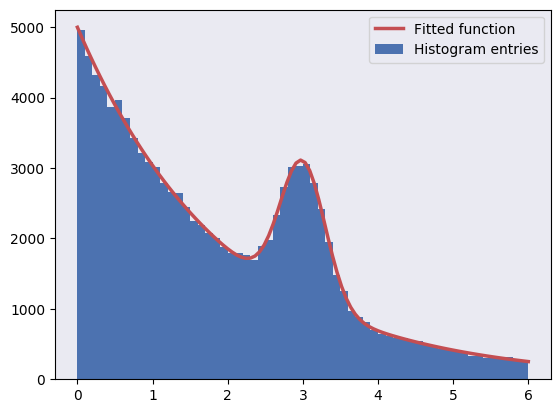

In [6]:
# Plot the histogram and the fitted function.
plt.bar(bin_centers, data_entries, width=bin_centers[1] - bin_centers[0], color='#4C72B0', label='Histogram entries')
plt.plot(xspace, fit_func(xspace, *popt), color='#C44E52', linewidth=2.5, label='Fitted function')

plt.legend()

###### Fit - 1D Histogram - Inclode COUNTING ERROR - 

In [12]:
#Generate Fake Data
#    -loc gives location of the peak!!!!!!!!!!
data  = np.random.exponential(scale=2.0, size=100000)
data2 = np.random.normal(loc=3.0, scale=0.3, size=15000)

#Bins
#    -Binning size is VERY VERY VERY VERY IMPORTANT!!!!!!
bins  = np.arange(0, 6.1, 0.1)
#bins starting from 1 percentile to 99 percentile, in increments of 0.1% locations
# bins = np.arange(df_tot_list[i]["beta_diff"].quantile([0.0001]).iloc[0], \
#                  df_tot_list[i]["beta_diff"].quantile([0.9999]).iloc[0], 0.01)

#Cetner of each bins - Final x data
bin_centers = np.array([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])

#array of occurances + corresponding bins
data_entries_1, bins = np.histogram(data, bins=bins)
data_entries_2, bins = np.histogram(data2, bins=bins)

#Add two generated histograms - Final y data
data_entries = data_entries_1 + data_entries_2

In [14]:
"""
-INCLUDE ERROR in each bin
    -counting statistics
    -\simga_i = \sqrt(n), where n is the number of events in ith bin.
 
-Absolute_sigma=True
    -sets sigma to be used in an abolute sense, not scaling it down to preserve normalization
"""

#Error include
sigma_n = np.sqrt(data_entries)

In [17]:
#Define function
def fit_func(x, A, beta, B, mu, sigma):
    
    #Define functions here
    first_func  = A*np.exp(-x/beta)
    second_func = B*np.exp(-1.0*(x - mu)**2 / (2*sigma**2))
    final_func  = first_func + second_func
    
    return final_func

In [18]:
#Fit the function to the histogram data
#    -popt  = fit results for the parameter
#    -pconv = covariance matrix: the diagonal elements of which represent the variance of the fitted parameters
#    -p0    = rough estimates for the fit parameters
#           = 1st = ESTIMATE OF MAX of the function, 2nd = mean, 3rd = stddev

popt, pconv = curve_fit(fit_func, xdata=bin_centers, ydata=data_entries, p0=[20000, 2.0, 2000, 3.0, 0.3], \
                        #ERROR INCLUDE 
                        sigma=sigma_n, absolute_sigma=True )

#Coefficients
print(popt)

[5.00181410e+03 2.00025816e+00 1.98621136e+03 3.00214563e+00
 2.99248460e-01]


In [19]:
#Generate enough x values to make the curves look smooth.
xspace = np.linspace(0, 6, 100)

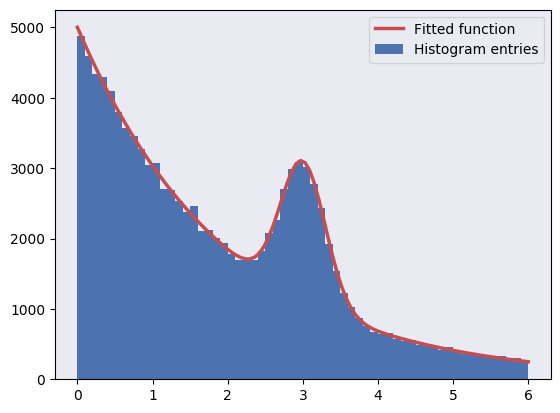

In [20]:
# Plot the histogram and the fitted function.
plt.bar(bin_centers, data_entries, width=bin_centers[1] - bin_centers[0], color='#4C72B0', label='Histogram entries')
plt.plot(xspace, fit_func(xspace, *popt), color='#C44E52', linewidth=2.5, label='Fitted function')

plt.legend()

###### Fit - Background & Signal SEPARATELY (exp + gaus)

* Fit function 1 and Fit function 2 only differ in the data it is fitting + form of fitting function
    * fit range (bins) are the same

In [70]:
#Generate Fake Data
#    -loc gives location of the peak!!!!!!!!!!
data  = np.random.exponential(scale=2.0, size=100000)
data2 = np.random.normal(loc=3.0, scale=0.3, size=15000)

#Bins
#    -Bin size is the MOST IMPORTANT!!!!!!!
bins  = np.arange(0, 6.1, 0.1)

#Hitogram with its defined bins
data_entries_1, bins = np.histogram(data, bins=bins)
data_entries_2, bins = np.histogram(data2, bins=bins)

#Add two generated histograms - Final y data
data_entries = data_entries_1 + data_entries_2

#Cetner of each bins - Final x data
bin_centers = np.array([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])

In [71]:
#Define function 1
def fit_func1(x, A, beta):
    #Define functions here
    first_func  = A*np.exp(-x/beta)
    return first_func

#Define function 2
def fit_func2(x, B, mu, sigma):
    #Define functions here
    second_func = B*np.exp(-1.0*(x - mu)**2 / (2*sigma**2))
    return second_func

#Define function
def fit_func(x, A, beta, B, mu, sigma):
    #Define functions here
    first_func  = A*np.exp(-x/beta)
    second_func = B*np.exp(-1.0*(x - mu)**2 / (2*sigma**2))
    final_func  = first_func + second_func
    return final_func

In [ ]:
#Fit the function to the histogram data
#    -popt  = fit results for the parameter
#    -pconv = covariance matrix: the diagonal elements of which represent the variance of the fitted parameters
#    -p0    = rough estimates for the fit parameters - VERY IMPORTANT!!!!!!!!!!!!

popt1, pconv1 = curve_fit(fit_func1, xdata=bin_centers, ydata=data_entries_1, p0=[20000, 2.0])
popt2, pconv2 = curve_fit(fit_func2, xdata=bin_centers, ydata=data_entries_2, p0=[20000, 3.0, 0.3])
popt, pconv   = curve_fit(fit_func, xdata=bin_centers, ydata=data_entries, p0=[20000, 2.0, 2000, 3.0, 0.3])

#Coefficients
print(popt1)
print(popt2)
print(popt)

In [73]:
# Generate enough x values to make the curves look smooth.
xspace = np.linspace(0, 6, 100)

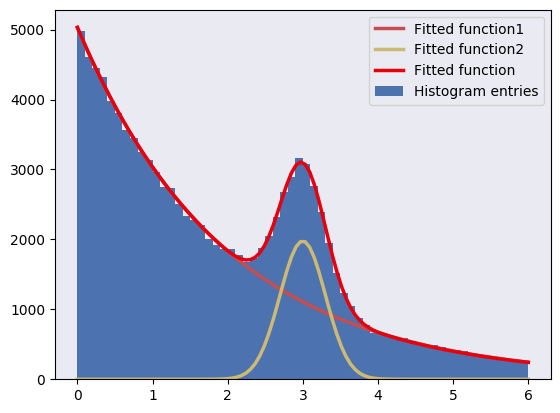

In [74]:
# Plot the histogram and the fitted function.
plt.bar(bin_centers, data_entries, width=bin_centers[1] - bin_centers[0], color='#4C72B0', label=r'Histogram entries')
plt.plot(xspace, fit_func1(xspace, *popt1), color='#C44E52', linewidth=2.5, label='Fitted function1')
plt.plot(xspace, fit_func2(xspace, *popt2), color='#CCB974', linewidth=2.5, label='Fitted function2')
plt.plot(xspace, fit_func(xspace, *popt), color='#E8000B', linewidth=2.5, label='Fitted function')


plt.legend()
plt.show()

###### Fit - Peak FInding - Example 1 - reduce DOF + Change bin width

In [22]:
#Generate Fake Data
#    -loc gives location of the peak!!!!!!!!!!
data  = np.random.normal(loc=3.25, scale=0.04, size=15000)
data2 = np.random.normal(loc=3.0, scale=0.3, size=25000)

#Bins
#    -Bin size is the MOST IMPORTANT!!!!!!!
#    -Bin width need to be smaller than the width of the peak you are trying to fit
bins  = np.arange(0, 6.1, 0.02)

#Hitogram with its defined bins
data_entries_1, bins = np.histogram(data, bins=bins)
data_entries_2, bins = np.histogram(data2, bins=bins)

#Add two generated histograms - Final y data
data_entries = data_entries_1 + data_entries_2

#Cetner of each bins - Final x data
bin_centers = np.array([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])

In [23]:
#Compute mean and peak to use as contraints when fitting
mids = np.array([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])

mean_1 = np.average(mids, weights=data_entries_1)
peak_1 = bins[np.argmax(data_entries_1)]
mean_2 = np.average(mids, weights=data_entries_2)
peak_2 = bins[np.argmax(data_entries_2)]

In [24]:
#fit func 1
def fit_func1(x, A, sigma):
    #Define functions here
    first_func  = A*np.exp(-1.0*(x - mean_1)**2 / (2*sigma**2))
    return first_func

#fit func 2
def fit_func2(x, B, sigma2):
    #Define functions here
    second_func = B*np.exp(-1.0*(x - mean_2)**2 / (2*sigma2**2))
    return second_func

#total fit function
def fit_func(x, A, sigma, B, sigma2):
    #Define functions here
    first_func  = A*np.exp(-1.0*(x - mean_1)**2 / (2*sigma**2))
    second_func = B*np.exp(-1.0*(x - mean_2)**2 / (2*sigma2**2))
    final_func  = first_func + second_func
    return final_func

In [25]:
#Fit the function to the histogram data
#    -popt  = fit results for the parameter
#    -pconv = covariance matrix: the diagonal elements of which represent the variance of the fitted parameters
#    -p0    = rough estimates for the fit parameters - VERY IMPORTANT!!!!!!!!!!!!

popt1, pconv1 = curve_fit(fit_func1, xdata=bin_centers, ydata=data_entries_1, p0=[20000, 0.01])
popt2, pconv2 = curve_fit(fit_func2, xdata=bin_centers, ydata=data_entries_2, p0=[2500, 0.3])
popt, pconv   = curve_fit(fit_func, xdata=bin_centers, ydata=data_entries, p0=[20000, 0.01,\
                                                                               2500, 0.3])
#Print parameters
print("popt1 = ", popt1)
print("popt2 = ", popt2)
print("popt  = ", popt)

popt1 =  [2.96316162e+03 4.04168557e-02]
popt2 =  [6.68326029e+02 2.98123846e-01]
popt  =  [2.97398148e+03 4.00873908e-02 6.69633411e+02 2.98337477e-01]


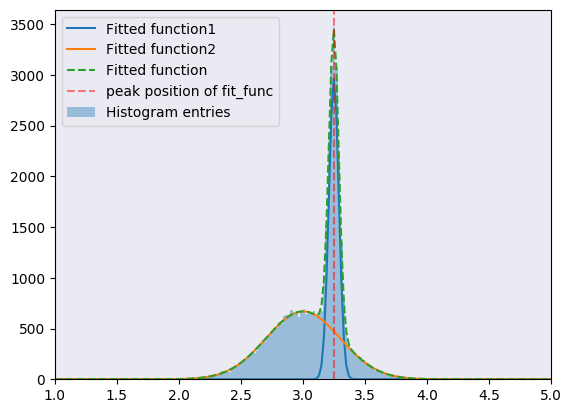

In [41]:
# Plot the histogram and the fitted function.
plt.bar(bin_centers, data_entries, width=bins[1]-bins[0], label=r'Histogram entries', alpha=0.4)
plt.plot(bin_centers, fit_func1(bin_centers, *popt1), label='Fitted function1')
plt.plot(bin_centers, fit_func2(bin_centers, *popt2), label='Fitted function2')
plt.plot(bin_centers, fit_func(bin_centers, *popt), label='Fitted function', linestyle="--")

#Peak position line
plt.axvline(bin_centers[np.argmax(fit_func(bin_centers, *popt))], color="red", ls="--", alpha=0.5, \
                                                                  label="peak position of fit_func")

plt.xlim(1, 5)
plt.legend()
plt.show()

###### Fit - Peak Finding 1 - reduce DOF

In [ ]:
"""
1. Failed Version
"""

In [176]:
#data
x = np.linspace(0,1,20)
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [177]:
n = np.size(x)
mean = sum(x*y)/n
sigma = np.sqrt(sum(y*(x-mean)**2)/n)

In [178]:
def gaus(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [179]:
popt,pcov = curve_fit(gaus,x,y,p0=[max(y),mean,sigma])

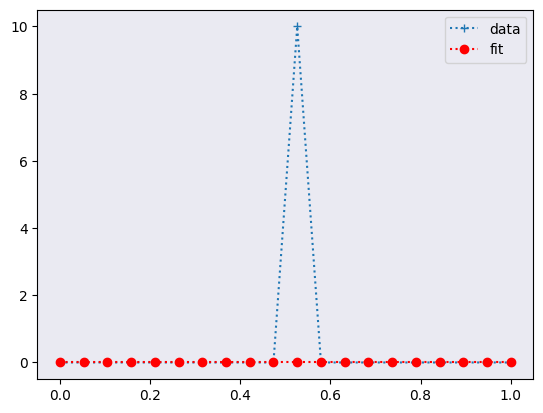

In [180]:
#Plot
plt.plot(x,y,'+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.show()

In [ ]:
"""
Fix 1: Reduce DOF by adding constraints on parameters + Set bounds + Change "maxfev" (# of tries) 

- The reason for failed fit is there are too many parameters that are indepenently effecting the height
  of the fit.

    - Meaning, I have a, x0, and sigma as variable parameters that scipy needs to find the adequte values of.
      But, we can fix x0 to be a constant and reduce the degree of freedom to 2. 
"""

In [182]:
#Data points
x     = np.linspace(0,1,20)
xdiff = x[1] - x[0]
y     = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [185]:
# the mean/median/mode all occur at the x coordinate of the one datapoint that is non-zero in y
mean  = x[np.argmax(y)]
# sigma should be tiny, since we want a narrow distribution
sigma = xdiff
# the scaling factor should be roughly equal to the "height" of the one datapoint
a     = y.max()

In [188]:
#Fixed fit function: Added "mean" as constant
def gaus(x, a, sigma):
    return a*np.exp(-(x-mean)**2/(2*sigma**2))

In [193]:
#Set bounds
bounds = ((1, .015), (20, 1))

#Fit
#    -Changed x0 to fixed constant xmean
#    -maxfev = 20000, Maximum number of calls to the function
popt,pcov = curve_fit(gaus, x, y, p0=[a, sigma], maxfev=20000, bounds=bounds)

#Calcualte error
residual  = ((gaus(x,*popt) - y)**2).sum()

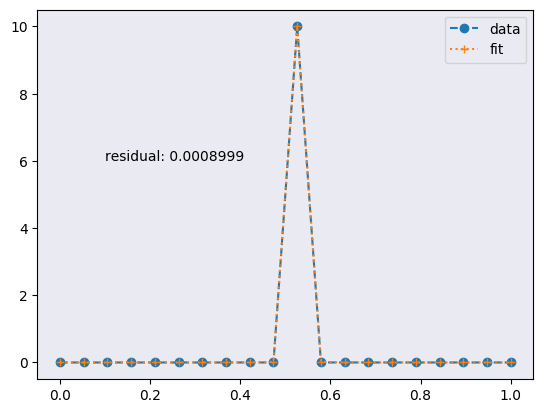

In [216]:
#Plot
plt.plot(x, y, 'o--', label='data')
plt.plot(x, gaus(x,*popt), '+:', label='fit')
plt.text(.1,6,"residual: {:.7f}".format(residual))

plt.legend()
plt.show()

###### Fit - Peak Finding 2 - Add constant for pedestal 

In [ ]:
"""
Fix 3: Add a constant term in the fitting functional if there is a pedestal in data points
"""

In [ ]:
#data
x = np.linspace(0,1,20)
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#Adding Pedestal
y = [i + 5 for i in y]

n = np.size(x)
mean = sum(x*y)/n
sigma = np.sqrt(sum(y*(x-mean)**2)/n)

def gaus(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[max(y),mean,sigma])

#Plot
plt.plot(x,y,'+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.show()

#FIX fit function by adding a constant, C
def gaus(x, a, x0, sigma, c):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + c

popt,pcov = curve_fit(gaus, x, y, p0=[max(y),mean,sigma, 6.])

#Plot
plt.plot(x,y,'+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()
plt.show()

###### Fit - Peak Finding 3 (scipy.find_peaks())

In [320]:
#Data
x = np.sin(2*np.pi*(2**np.linspace(2,10,1000))*np.arange(1000)/48000) + \
    np.random.normal(0, 1, 1000) * 0.15

#Find peaks using various info
peaks, _0  = find_peaks(x, distance=20)
#MINIMUM vertical distance between the peak and its lowest contour line.
peaks2, _1 = find_peaks(x, prominence=1)
#width of peak
peaks3, _2 = find_peaks(x, width=20)
#Required vertical distance to its direct neighbouring samples
peaks4, _3 = find_peaks(x, threshold=0.4)     

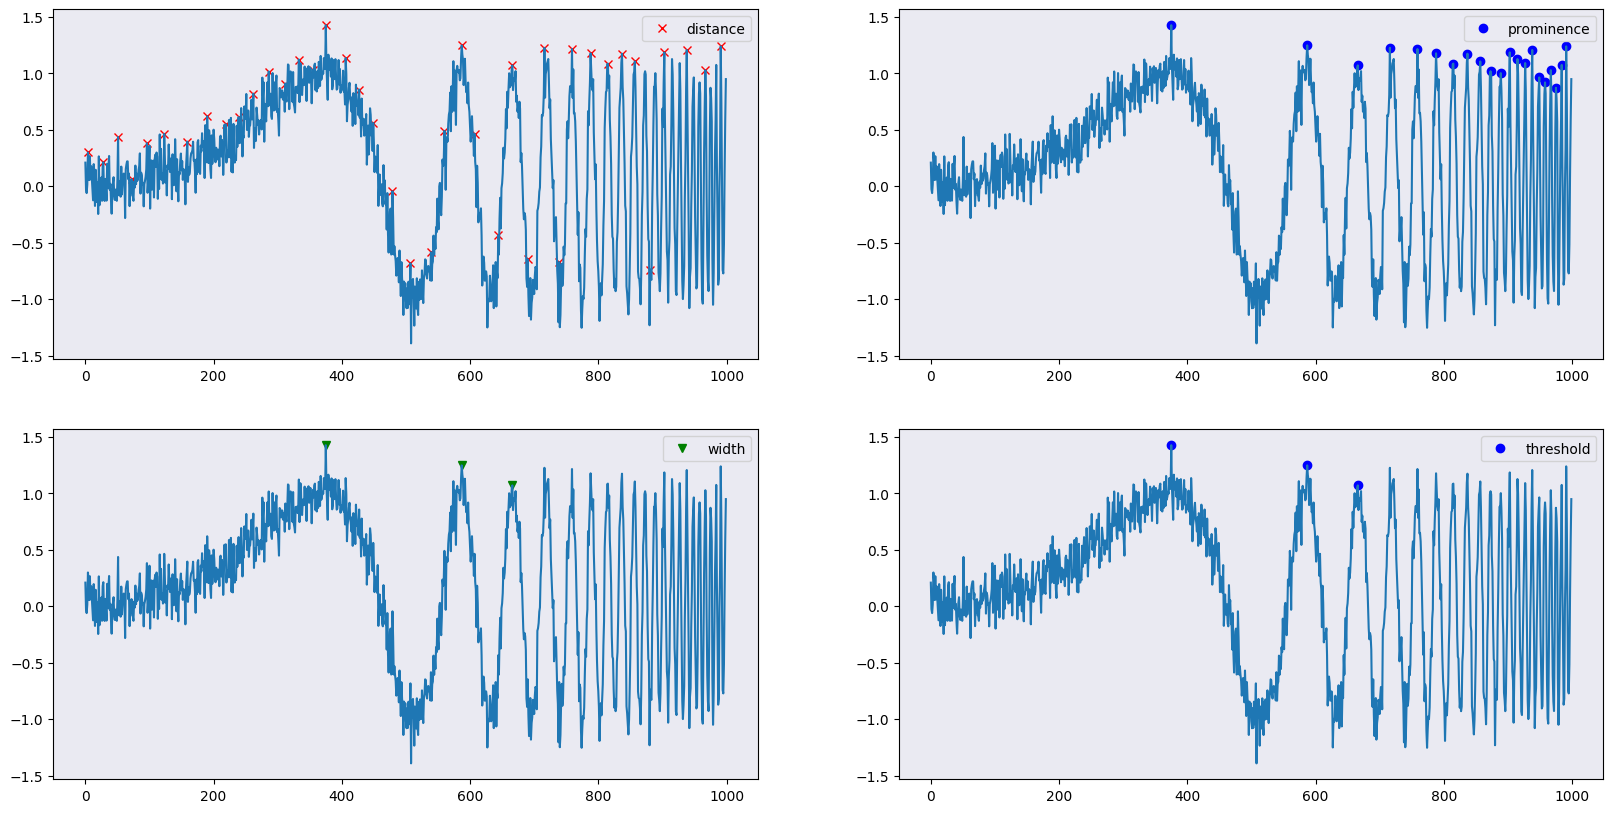

In [321]:
#Plot
find_peaks_plot, subplot = plt.subplots(2, 2, figsize=(20, 10))

subplot[0, 0].plot(peaks, x[peaks], "xr", label="distance")
subplot[0, 0].plot(x)
subplot[0, 0].legend()

subplot[0, 1].plot(peaks2, x[peaks2], "ob", label="prominence")
subplot[0, 1].plot(x)
subplot[0, 1].legend()

subplot[1, 0].plot(peaks3, x[peaks3], "vg", label="width")
subplot[1, 0].plot(x)
subplot[1, 0].legend()

subplot[1, 1].plot(peaks3, x[peaks3], "ob", label="threshold")
subplot[1, 1].plot(x)
subplot[1, 1].legend()

plt.show()

###### Fit - Peak Finding 4 (scipy.find_peaks())

In [336]:
#Import dataset
from scipy.misc import electrocardiogram

#Data
x = electrocardiogram()[2000:4000]

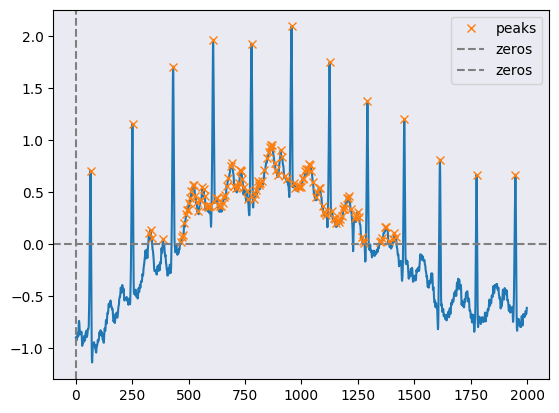

In [337]:
"""
1. Find peaks above certain height
"""

#Find peak at which the height are above 0 
peaks, _ = find_peaks(x, height=0)

#PLot
plt.plot(x)
plt.plot(peaks, x[peaks], "x", label="peaks")
plt.axhline(0, linestyle="--", color="gray", label="zeros")
plt.axvline(0, linestyle="--", color="gray", label="zeros")
plt.legend()
plt.show()

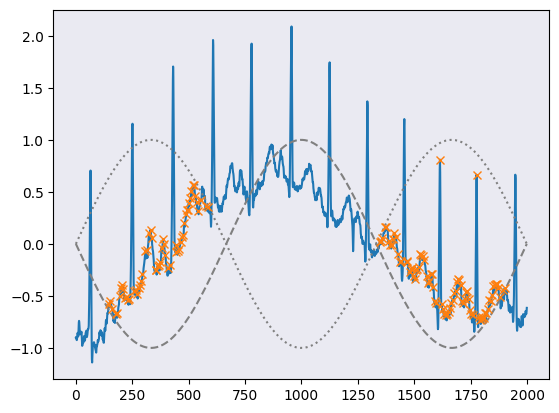

In [338]:
"""
2. Find peaks specific bounds
"""

#Find peaks under border
border = np.sin(np.linspace(0, 3 * np.pi, x.size))
peaks, _ = find_peaks(x, height=(-border, border))

#Plot
plt.plot(x)
plt.plot(-border, "--", color="gray")
plt.plot(border, ":", color="gray")
plt.plot(peaks, x[peaks], "x")
plt.show()

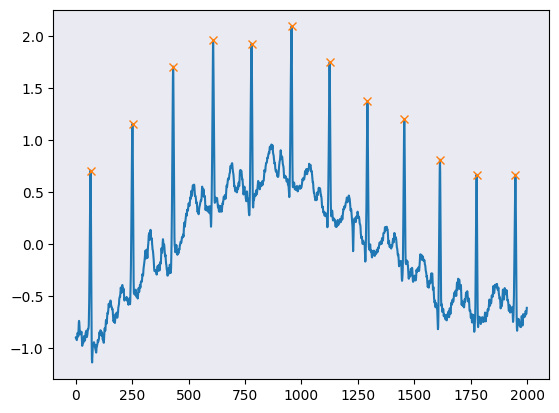

In [339]:
"""
3. Find peaks that are distanced at certain range
"""
#Find speaks spaced by 150
peaks, _ = find_peaks(x, distance=150)

#PLot
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

properties["prominences"], properties["widths"] =  [1.495 1.565 1.655 2.3   1.88 ] [36.93773946  7.14150718  7.38614341 39.32723577  8.17883298]


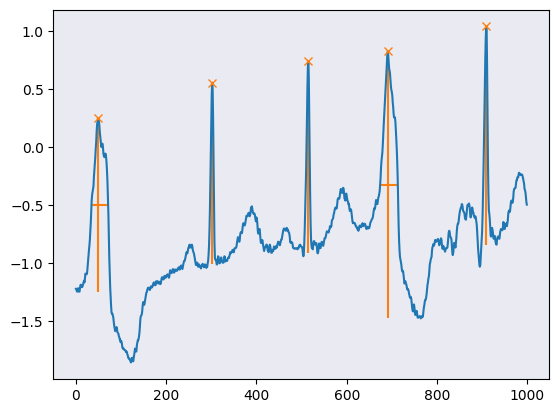

In [340]:
"""
4. Find peaks with certain prominence limits + WIDTHS
    -prominence = MINIMUM vertical distance between the peak and its lowest contour line
                = measures how much a peak stands out from the surrounding baseline of the signal
    -Width      = MINIMUM width of the peak.
                = FWHM = Full Width at Half Maximum
"""

#### Data
x = electrocardiogram()[17000:18000]

#Find peaks
peaks, properties = find_peaks(x, prominence=1, width=5)

#Properties of peaks
print('properties["prominences"], properties["widths"] = ', properties["prominences"], properties["widths"])

#Plot
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"], ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"], \
           xmax=properties["right_ips"], color = "C1")
plt.show()

###### Fit - Set bounds for parameters 

In [ ]:
#Fitting for Butanol (MUST)
def fit_buta(x, A, mu, sigma, sf):

    #interpolation function from carbon
    #    -You want ONE number from ynew
    backgrnd = sf*scipy.interpolate.splev(x, spl_fn) 

    #Gaussian for butanol peak
    gaussian = A*np.exp(-1.0*(x - mu)**2 / (2*(sigma**2)))
    
    #Add 
    final_fit_func = gaussian + backgrnd
    
    return final_fit_func

In [ ]:
#Make the fit (MUST)
popt, pconv = curve_fit(fitg4y_buta, xdata=bin_centers, ydata=hist_buta, \
                        p0=[num_buta, peak_buta, stddev_buta, 6],
                        #Set bounds
                        bounds=([0,                   peak_buta - stddev_buta, 0,             4.], \
                                [3*len(butanol_data), peak_buta + stddev_buta, 3*stddev_buta, 8.])) 

#Use np.inf for inifites
# popt, pconv = curve_fit(fitg4y_buta, xdata=bin_centers, ydata=hist_buta, \
#                         p0=[num_buta, peak_buta, stddev_buta, 6],
#                         #Set bounds
#                         bounds=([0,      peak_buta - stddev_buta, 0,               4.], \
#                                 [np.inf, np.inf,                  3*stddev_buta,   8.])) 

In [ ]:
#Fitting Plot (CHECK)
fitting = plt.figure(figsize=(10, 6))

#=================================================================================================
#Plot
plt.hist(carb_dict[epho_keys[epho_bin]][cos_bin]["el_pc_mmsq_pi0"], bins=buta_bins, label="carbon", color="#55A868", alpha=1, range=(-0.8, 0.4))
plt.hist(buta_dict[epho_keys[epho_bin]][cos_bin]["el_pc_mmsq_pi0"], bins=buta_bins, label="butanol", color="#4C72B0", alpha=0.5, range=(-0.8, 0.4))

#Carbon Fit
plt.plot(knot_pos, ynew, "--", linewidth=1.5, label="carbon Fit", color="#4C72B0")

#Buta backgroun only
plt.plot(knot_pos, popt[3]*(ynew), "-", linewidth=3., label="butanol bound", color="#55A868")

#Buta background + peak
plt.plot(bin_centers, fit_buta(bin_centers, *popt), "--", linewidth=1.5, label="butanol bound + free", color="#C44E52")

#Plot knot positions
for i in range(len(knot_pos)):
    plt.axvline(knot_pos[i], linestyle="-.")

#=================================================================================================
#Grids
plt.axes().xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
plt.axes().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
plt.grid(b=True, which="major", color="gray", linewidth=0.5, linestyle="--")
plt.grid(b=True, which="minor", color="gray", linewidth=0.25, linestyle="--")

#Texts
plt.text(0.03, 0.63, " Scale Factor {:>10.2f}" \
         .format(popt[3]), \
         fontsize=10, bbox=dict(facecolor='none', pad=5.0), transform=plt.gca().transAxes)

#Labels, ticks, lim
plt.xlabel("Missing mass sq. $[GeV^2/c^4]$", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(knot_pos[0], knot_pos[-1])
plt.ylim(0)

#Set Title
plt.title("$E_{{\gamma}} \in [ {:.2f}, {:.2f}]$ \t $cos\\theta_{{cm}} \in [ {:.2f}, {:.2f}]$" \
          .format(epho_bins[epho_bin], epho_bins[epho_bin+1], cos_bins[cos_bin], cos_bins[cos_bin+1]),\
          fontsize=15)

plt.legend(fontsize=10, loc="upper left")
plt.show()
fitting.savefig("./run_period_1/fitting_{:d}_{:d}".format(epho_bin, cos_bin))

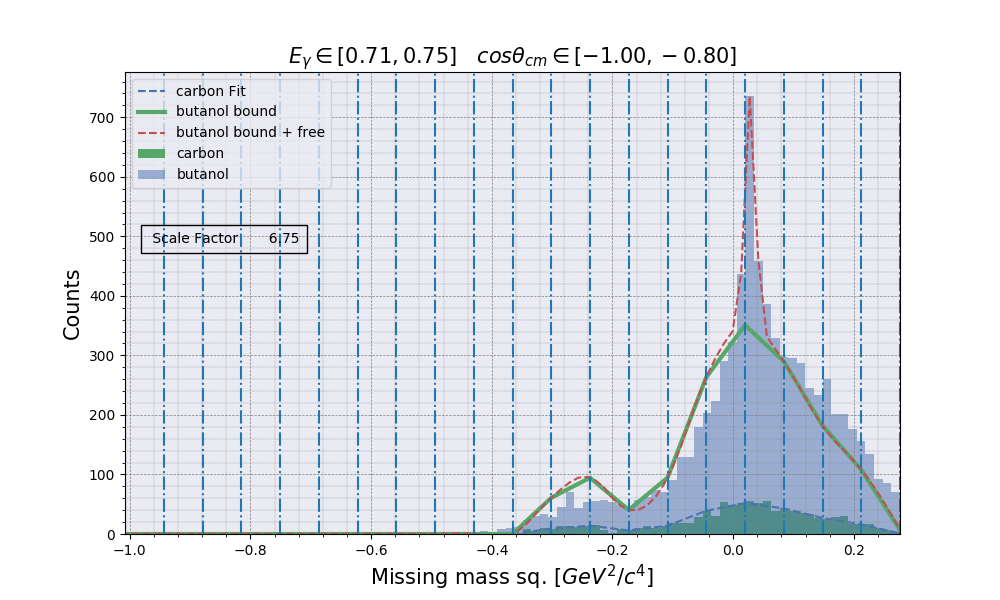

In [3]:
Image(filename="./1_figs/fitting_10_0.png")

###### Fit - Finding Peak location when multiple backgrounds 

In [ ]:
#Scale Factor Phase 0 - FIT THE BUTANOL FREE PEAK (MUST)

#Fitting Gaussian for Butanol free peak
def fit_buta_free(x, A, mu, sigma):
    #Gaussian for butanol peak
    gaussian = A*np.exp(-1.0*(x - mu)**2 / (2*(sigma**2)))
    return gaussian

#Fitting fn
def fit_Free_Buta(buta_dict={}, epho_bins=[], cos_bins=[]):
    #================================================================================================
    #Dictionary to contain final fit parameters
    free_buta_dict = {}
    
    #Keys for buta_dict
    epho_keys = sorted(buta_dict.keys())

    #================================================================================================
    #For each epho bins
    for i in range(len(epho_keys)):
        #List for each epho bin, contining all cos\theta bins elements
        free_buta_1epho_cos_list = []
        
        #======================================================================================================
        #For each cos bins
        for j in range(len(cos_bins)-1):
        
            #================================================================================================
            #Histogram for all butanol
            df_buta             = buta_dict[epho_keys[i]][j]
            data_buta           = np.array(df_buta["el_pc_mmsq_pi0"])
            hist_buta, bin_buta = np.histogram(data_buta, bins="fd") 

            #Stats to be used for selecting out free butanol region
            mids_all   = [0.5*(bin_buta[i] + bin_buta[i+1]) for i in range(len(bin_buta)-1)]
            mean_all   = np.average(mids_all, weights=hist_buta)
            var_all    = np.average(((mids_all-mean_all)**2), weights=hist_buta)
            stddev_all = np.sqrt(var_all)
            peak_all   = bin_buta[np.argmax(hist_buta)]
        
            #================================================================================================
            #Histogram for Free butanol peak
            #    -Select only the free peak regions by using peak and std from ALL butanol
            data_free_buta = df_buta[(df_buta["el_pc_mmsq_pi0"] > peak_all - 0.3*stddev_all) & \
                                     (df_buta["el_pc_mmsq_pi0"] < peak_all + 0.3*stddev_all)]
            
            #Histogramming
            hist_free_buta, bin_free_buta = np.histogram(np.array(data_free_buta), bins=bin_buta) 

            #Stats to be used for fitting as initial parameters
            mids_free   = [0.5*(bin_free_buta[i] + bin_free_buta[i+1]) for i in range(len(bin_free_buta)-1)]
            mean_free   = np.average(mids_free, weights=hist_free_buta)
            var_free    = np.average(((mids_free-mean_free)**2), weights=hist_free_buta)
            stddev_free = np.sqrt(var_free)
            peak_free   = bin_free_buta[np.argmax(hist_free_buta)]
            num_free    = len(data_free_buta)
            
            #FIT
            popt, pconv = curve_fit(fit_buta_free, xdata=mids_free, ydata=hist_free_buta, \
                                    p0=[num_free, mean_free, stddev_free])
        
            #======================================================================================================
            #Append mids_free (x points) of each bins for plotting
            #Append fit parameters for each bin
            #Append bins used for "ALL" butanol histogram, to be used for plotting histograms
            free_buta_1epho_cos_list.append([bin_buta, mids_free, popt])
            
        #======================================================================================================
        free_buta_dict["Eg_{:07.3f}".format(epho_bins[i])] = free_buta_1epho_cos_list        
        
    return free_buta_dict

In [ ]:
#Fit (MUST)
free_buta_dict = fit_Free_Buta(buta_dict, epho_bins, cos_bins)

In [ ]:
#Plot buta mmsq + free peak fit (CHECK)
buta_mmsq_epho_cos_1, subplot = plt.subplots(10, 10, figsize=(30, 20))

#list of names of epho bins
epho_keys = sorted(buta_dict.keys())

#Plot
for i in range(0, 10):
    for j in range(10):
        
        #Bins needs to be matched for the histogram and the histograms used to make the fitting
        bin_buta = free_buta_dict[epho_keys[i]][j][0]

        #Results from fitting
        #    -X coordinates for plotting fit results, obtained via fitting
        #    -Y values for plotting fit results, obtained via fitting
        x_coor    = free_buta_dict[epho_keys[i]][j][1]
        y_val     = fit_buta_free(x_coor, *free_buta_dict[epho_keys[i]][j][2])        
            
        #Ranges
        range_list = buta_dict[epho_keys[i]][j]["el_pc_mmsq_pi0"].quantile([0.01, 0.999]).tolist()
        
        #Plot
        subplot[i, j].hist(buta_dict[epho_keys[i]][j]["el_pc_mmsq_pi0"], label="Butanol", \
                           bins=bin_buta, alpha=0.7, range=(range_list[0], range_list[1]), \
                           color="#4C72B0")     
            
        subplot[i, j].plot(x_coor, y_val, linewidth=2, label="Free Nucleon", color="#C44E52")
        
        #lim
        subplot[i, j].set_xlim(range_list[0], range_list[1])

plt.show()
buta_mmsq_epho_cos_1.savefig("./run_period_1/buta_mmsq_epho_cos_1")

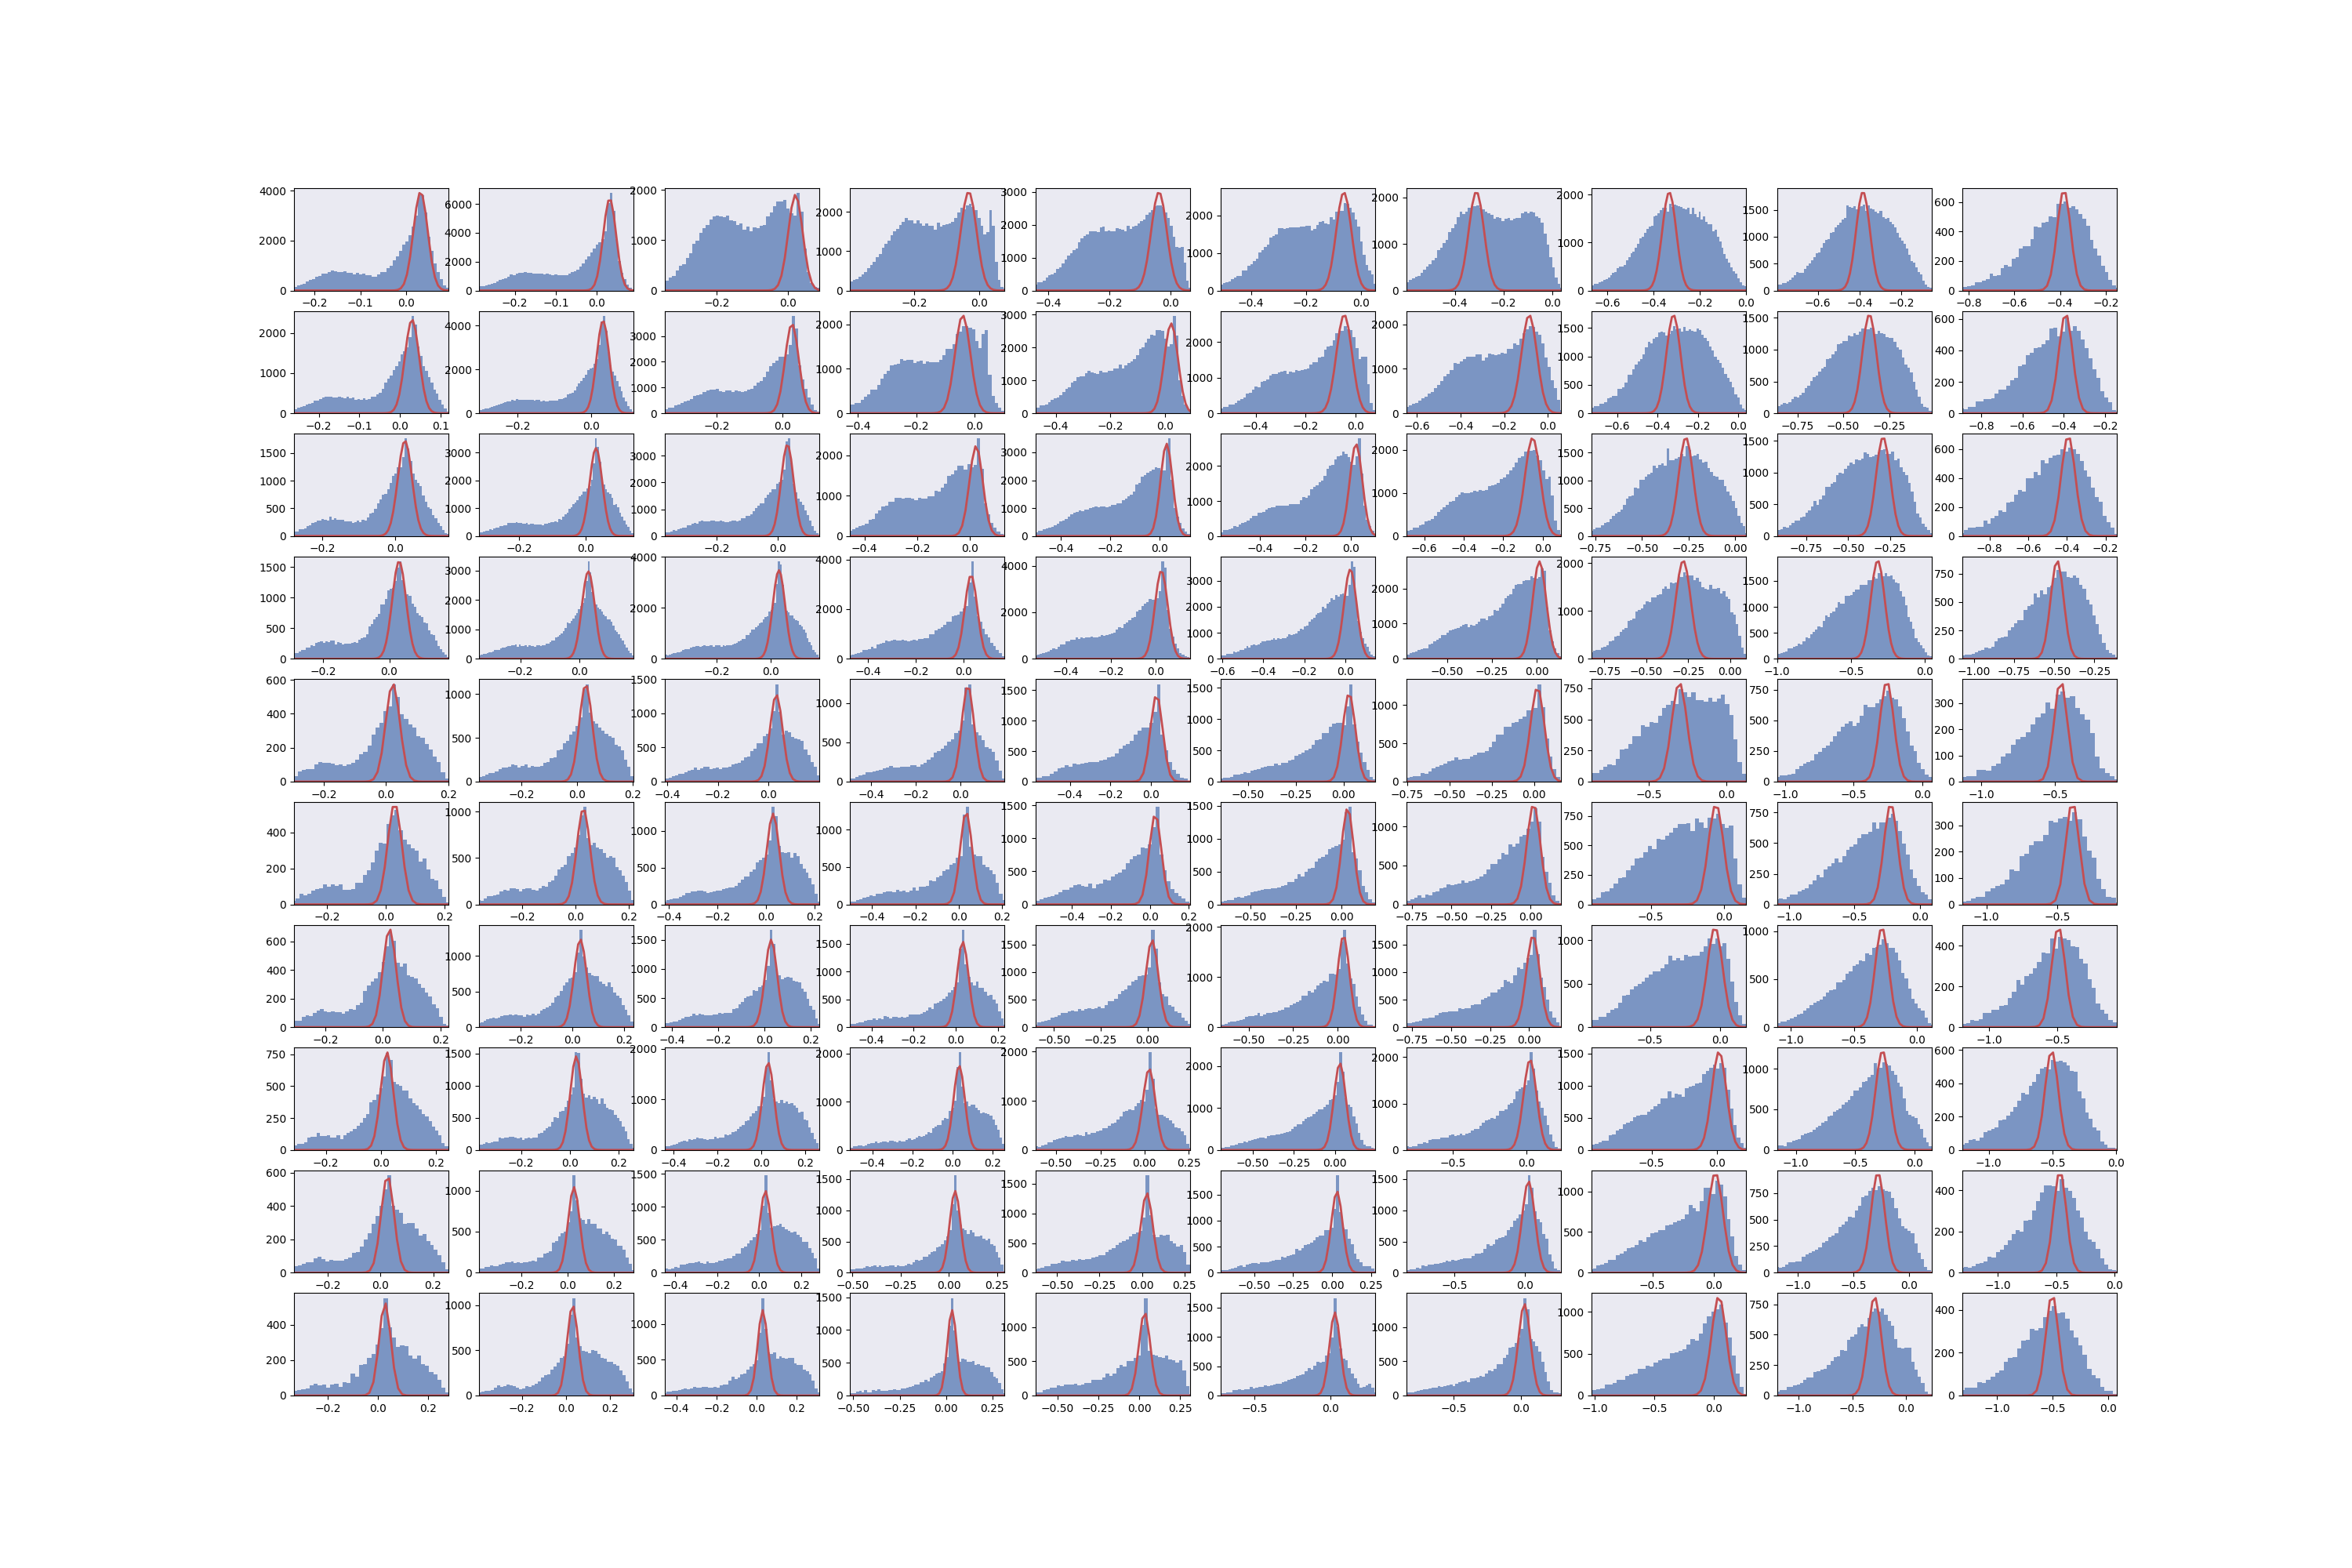

In [5]:
Image(filename="./1_figs/buta_mmsq_epho_cos_1.png")`

###### Fit - overlaping Peaks 

In [110]:
#Generate Fake Data
#    -loc gives location of the peak!!!!!!!!!!
data  = np.random.normal(loc=-20.0, scale=5., size=500)
data2 = np.random.normal(loc=20.0,  scale=5., size=500)
data3 = np.random.normal(loc=0.,    scale=8., size=2000)
data4 = np.random.uniform(-100, 100., size=1000)

#Bins
#    -Bin size is the MOST IMPORTANT!!!!!!!
bins  = np.arange(-500, 500, 1.)

#Hitogram with its defined bins
data_entries_1, bins = np.histogram(data, bins=bins)
data_entries_2, bins = np.histogram(data2, bins=bins)
# data_entries_3, bins = np.histogram(data3, bins=bins)
# data_entries_4, bins = np.histogram(data4, bins=bins)

#Add two generated histograms - Final y data
# data_entries = data_entries_1 + data_entries_2
data_entries = data_entries_1 + data_entries_2 + data_entries_3 + data_entries_4

#Cetner of each bins - Final x data
bin_centers = np.array([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])

In [ ]:
#Plot Data
plt.figure(figsize=(15, 5))
plt.bar(bin_centers, data_entries, width=bin_centers[1] - bin_centers[0], color='#4C72B0', label=r'Histogram entries')

plt.xticks(np.arange(-200, 200, 10))
plt.xlim(-200, 200)
plt.show()

In [112]:
#Fit func
def gaussian(x, A, x0, sig):
    return A*np.exp(-(x-x0)**2/(2*sig**2))

#Multiple fit function calling
def multi_gaussian(x, *pars):
    offset = pars[-1]
    g1 = gaussian(x, pars[0], pars[1], pars[2])
    g2 = gaussian(x, pars[3], pars[4], pars[5])
    g3 = gaussian(x, pars[6], pars[7], pars[8])
    return g1 + g2 + g3 + offset

In [117]:
#Initial guesses for the parameters to fit:
#    -3 amplitudes, means and standard deviations plus a continuum offset.
guess = [50, -20, 5, 50, 20, 5, 90, 0, 8, 10]

#Fit
popt, pcov = curve_fit(multi_gaussian, bin_centers, data_entries, guess)
print(popt)


[ 49.49320392 -19.50407293   5.58060016  45.2850307   19.72302738
   6.20953956  86.28987532   0.1436209    8.7290766    0.71544848]


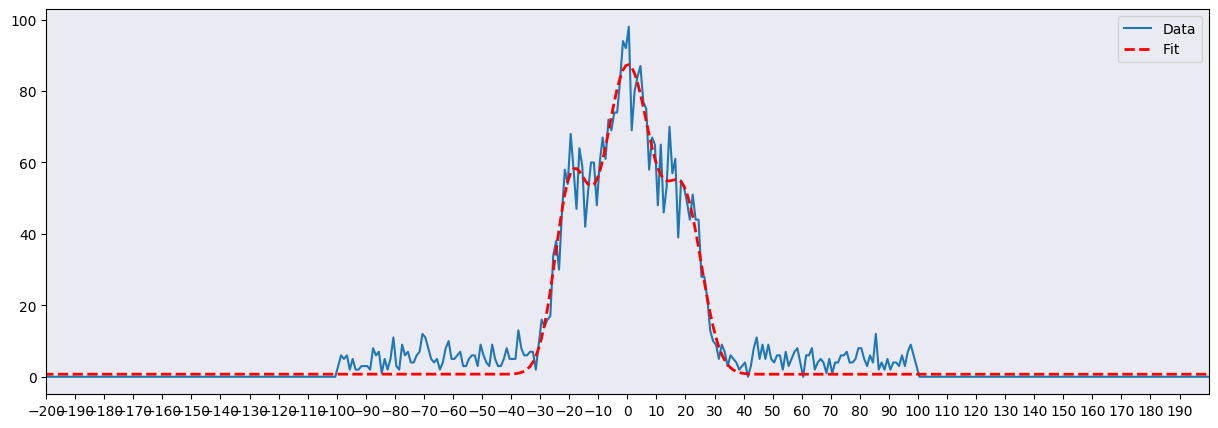

In [116]:
#Plot
plt.figure(figsize=(15, 5))
plt.plot(bin_centers, data_entries, label='Data')
plt.plot(bin_centers, multi_gaussian(bin_centers, *popt), 'r--', linewidth=2, label='Fit')

plt.xticks(np.arange(-200, 200, 10))
plt.xlim(-200, 200)
plt.legend()
plt.show()

###### Fit - Chi-Square values for testing FIT result

In [214]:
#Define chi-squared function to be minimized while fitting
def f(x, a1, a2, a3):
    return np.sqrt(np.sin(a1*np.pi*x)**2 + a2*np.cos(a3*np.pi*x)**2)

In [ ]:
#Create random data
#    -20 random data points inbetween [0, 2]
x = np.random.rand(20)*2
x

In [216]:
#True values
y_true = f(x, 1, 2, 3)

In [217]:
#Error generate
sig = 0.1*y_true

In [ ]:
#Generate data with error
#    -true value + fluctuation (0.1 stddev)
y = y_true + np.random.rand(len(y_true))*sig
y

In [ ]:
#x input for plotting
x_input = np.arange(0, 2, 0.02)
x_input

In [ ]:
#Plot
plt.errorbar(x, y, yerr=sig, fmt="o", label="data", capsize=3, elinewidth=0.5)
plt.plot(x_input, f(x_input, 1, 2, 3), label="True")

plt.legend()
plt.show()

"""
* Since we set gaussian random numbers with 1 sigma error bar, meaing %68 of the time, the data points + error
  bars should overlap with the true value.

    * np.random.rand(len(y_true))*0.1*y_true

"""

In [231]:
#Fitting
a1, C1 = scipy.optimize.curve_fit(f, x, y, sigma=sig)

In [ ]:
#Best estimate of parameters
a1

In [ ]:
#Best estimate of covariance matrix
C1

In [ ]:
#Extract uncertainties (variance) of estimated parameters by looking at diagonal elements of covariance matrix
np.sqrt(np.diag(C1))

In [ ]:
#Plot
plt.errorbar(x, y, yerr=sig, fmt="o", label="data", capsize=3, elinewidth=0.5)
plt.plot(x_input, f(x_input, 1, 2, 3), label="True")
plt.plot(x_input, f(x_input, *a1), label="FIT try1")


plt.legend(loc="upper right")
plt.show()

In [ ]:
#Chi-Square
#    -sum of our data - model divided by uncertainty squared
#    -Chi-Square should be approximately close to Degree of Freedom
chisql = sum((y - f(x, *a1))**2 / sig**2)
chisql

In [ ]:
#Degree of freedom
#    -dof = # of data points - # of parameters

"""
* Chi-Square should be close to degree of freedom
* Currently
"""

dof = len(y) - len(a1)
print(dof)


In [ ]:
#Check GOODNESS OF FIT
import scipy.special

#incomplete gamma function. 
#    -Probability that our data was drawn from this model of parameters
#        -Simply, probability of this being a good model to describe the true value. So, fit is really bad

"""
* Minimized the chi-square, but the model is bad. Why?
    * Because it found the LOCAL minimum, not a GLOBAL minimum!!!

* Therefore, we need to provide p0 in curve_fit(): the initial starting points to hone into the global minimum
    * meaning, we need to know a good approximation of the true value
"""

scipy.special.gammaincc(dof/2., chisql/2)

###### Fit - LMFIT - EX1-Fit both peaks and multiple backgrounds

In [3]:
from lmfit.models import LorentzianModel, QuadraticModel

In [ ]:
#LMFIT multiple peaks
test = np.loadtxt('spectra.txt')
xdat = test[0, :]
ydat = test[1, :]

def add_peak(prefix, center, amplitude=0.005, sigma=0.05):
    peak = LorentzianModel(prefix=prefix)
    pars = peak.make_params()
    pars[prefix + 'center'].set(center)
    pars[prefix + 'amplitude'].set(amplitude)
    pars[prefix + 'sigma'].set(sigma, min=0)
    return peak, pars

model = QuadraticModel(prefix='bkg_')
params = model.make_params(a=0, b=0, c=0)

rough_peak_positions = (0.61, 0.76, 0.85, 0.99, 1.10, 1.40, 1.54, 1.7)
for i, cen in enumerate(rough_peak_positions):
    peak, pars = add_peak('lz%d_' % (i+1), cen)
    model = model + peak
    params.update(pars)

init = model.eval(params, x=xdat)
result = model.fit(ydat, params, x=xdat)
comps = result.eval_components()

print(result.fit_report(min_correl=0.5))

plt.plot(xdat, ydat, label='data')
plt.plot(xdat, result.best_fit, label='best fit')
for name, comp in comps.items():
    plt.plot(xdat, comp, '--', label=name)
plt.legend(loc='upper right')
plt.show()

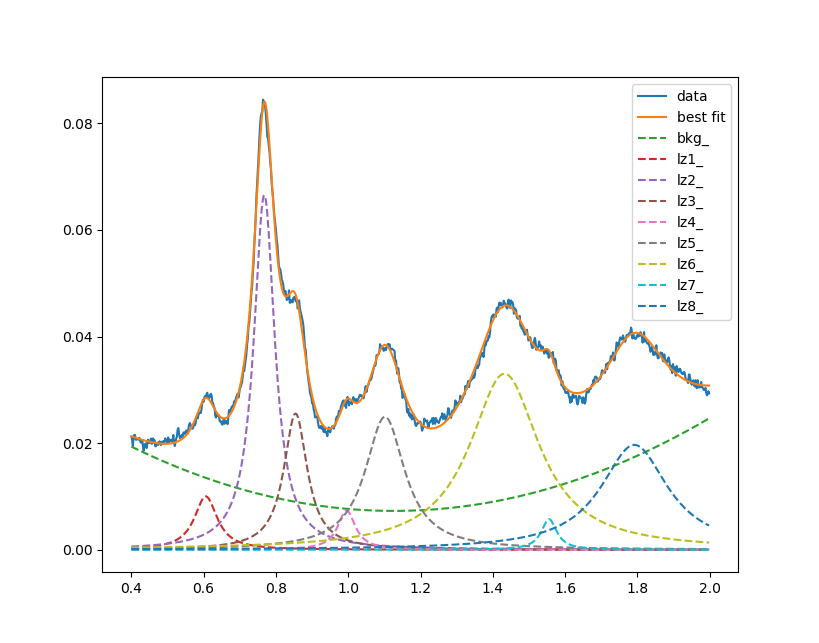

In [6]:
Image(filename="./1_figs/lmfit_ex.png")

###### Fitting + Splines - Background subtraction

In [ ]:
#Splines Interpolation for Carbon

#Carbon data
carbon_data      = np.array(carb_dict["Eg_000.700"][2]["mmsq_pi0"])

#hist_carbogram
hist_carb1, bins = np.histogram(carbon_data, bins="fd")

#Define knot positions
xpos_partition_perc  = [i/10 for i in range(1, 11, 1)]
# initial              = [0.05/(2**3), 0.05/(2**2), 0.05/2, 0.05]
initial              = [0.05/(2**5), 0.05/(2**4), 0.05/(2**3), 0.05/(2**2), 0.05/2, 0.05]
xpos_partition_perc  = initial + xpos_partition_perc
knot_pos             = carb_dict["Eg_000.700"][2]["mmsq_pi0"].quantile(xpos_partition_perc).tolist()

#In which bin, does the knows reside
knot_bin_pos = []
for i in range(len(knot_pos)):
    for j in range(len(bins)-1):
        if (knot_pos[i] >= bins[j] and knot_pos[i] <= bins[j+1]):
            knot_bin_pos.append(j)

#Y-value (counts) of knot positions
y = hist_carb1[knot_bin_pos]

#Splines Function
spl_fn = scipy.interpolate.splrep(knot_pos, y, k=2)

#Evaluate define Splines function at MORE x positions
xnew_perc = [i/20 for i in range(1, 21, 1)]
# initial   = [0.05/(2**3), 0.05/(2**2), 0.05/2, 0.05]
initial   = [0.05/(2**5), 0.05/(2**4), 0.05/(2**3), 0.05/(2**2), 0.05/2, 0.05]
xnew_perc = initial + xnew_perc
xnew      = carb_dict["Eg_000.700"][2]["mmsq_pi0"].quantile(xnew_perc).tolist()

#Evaluate xnew at defined splines function
ynew      = scipy.interpolate.splev(xnew, spl_fn) 

In [ ]:
#Fitting for Butanol
def fit_buta(x, A, mu, sigma, sf):
    #Gaussian for butanol peak
    gaussian = A*np.exp(-1.0*(x - mu)**2 / (2*(sigma**2)))
    
    #interpolation function from carbon
    #    -You want ONE number from ynew
    backgrnd = sf*scipy.interpolate.splev(x, spl_fn) 
    
    #Add 
    final_fit_func = gaussian + backgrnd
    return final_fit_func

In [ ]:
#Data for fitting butanol
#    -butanol should have same bins as Carbon

#Butanol data
butanol_data     = np.array(buta_dict["Eg_000.700"][2]["mmsq_pi0"])

#hist_carbogram
#    -bins defined from carbon splines interpolation step
hist_buta, bins  = np.histogram(butanol_data, bins=bins)

#Bin Center
bin_centers      = np.array([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])

In [ ]:
#Make the fit
popt, pconv      = curve_fit(fit_buta, xdata=bin_centers, ydata=hist_buta, \
                             p0=[len(butanol_data)/5, \
                                 bins[np.argmax(hist_buta)], \
                                 butanol_data.std()/5, 5], 
                                 #Set bounds
                                 bounds=([0,      bins[np.argmax(hist_buta)] - butanol_data.std(), \
                                          0, 4.], \
                                         [len(butanol_data), bins[np.argmax(hist_buta)] + butanol_data.std(), \
                                          butanol_data.std(), 12.])) 

In [ ]:
#Plot
plt.figure(figsize=(12, 12))

plt.hist(carb_dict["Eg_000.700"][2]["mmsq_pi0"], bins=bins, label="carbon", color="#55A868", alpha=1, range=(-0.8, 0.4))
plt.hist(buta_dict["Eg_000.700"][2]["mmsq_pi0"], bins=bins, label="butanol", color="#4C72B0", alpha=0.5, range=(-0.8, 0.4))

#Carbon
plt.plot(xnew, ynew, "--", linewidth=2.5, label="Carbon Fit")

#Buta backgroun only
plt.plot(xnew, popt[3]*(ynew), "-", linewidth=5, label="butanol bound")

#Buta background + peak
plt.plot(bin_centers, fit_buta(bin_centers, *popt), "--", linewidth=2.5, label="butanol bound + free")

plt.legend()
plt.show()

In [ ]:
Image(filename="background_subtract.png")

###### Fit example - 4th_poly + Gaussian fitting

In [ ]:
"""
#=====================================================================================
#NEW METHOD 1

-TRY carbon fitting with 
    -4th poly + 1 Gaussian for ICE
    -1 constant + 2 gaussians
        -1gauss at peak of carb, 1gauss mean - free to vary - another fitting param

-Then, CHISQ FITTING with fitted carbon BACKGROUND!!!

"""    

In [ ]:
# #Interested epho bins and cos_bins (MUST)
# epho_bin  = 0
# cos_bin   = 1
# # left_right_knots_num = 10

In [ ]:
# #scale factor final (MUST)
# def sf_final(epho_bin=0, cos_bin=0, \
#              buta_dict={}, carb_dict={}, bf_params_dict={}, init_sf_2_dict={}, \
#              left_fit_range=2.5, right_fit_range=2.5, \
#              carb_init_guess_mltplr = [0.5, 0.5, 0.5, 1, 1, 1], \
#              bounds_carb_mltplr = ([0, 0, 0, 0, 0, 0], [1, 10, 1, 2, 10, np.inf]), \
#              chi_init_guess_mltpir = [1, 1, 1], 
#              bounds_chi_mltplr = [(0, 1), (0, 1), (0.1, 2)]):     
    
#     #=====================================================================================
#     #keys for epho_bins
#     epho_keys = sorted(bf_params_dict.keys())    
    
#     #=====================================================================================
#     #df declare for butanol and carbon
#     df_buta = buta_dict[epho_keys[epho_bin]][cos_bin]
#     df_carb = carb_dict[epho_keys[epho_bin]][cos_bin]
    
#     #Remove Outliers - region selection
#     range_list = df_carb["el_pc_mmsq_pi0"].quantile([0.01, 0.999]).tolist()
    
#     #Remove Outliers - remove
#     df_carb = df_carb[(df_carb["el_pc_mmsq_pi0"] >= range_list[0]) & \
#                       (df_carb["el_pc_mmsq_pi0"] <= range_list[1])]
#     df_buta = df_buta[(df_buta["el_pc_mmsq_pi0"] >= range_list[0]) & \
#                       (df_buta["el_pc_mmsq_pi0"] <= range_list[1])]
    
#     #=================================================================================================
#     #Into numpy
#     butanol_data = np.array(df_buta)
#     carbon_data  = np.array(df_carb)
    
#     #Bin Number Determine
#     raw_sf = int(init_sf_2_dict[epho_keys[epho_bin]][cos_bin])
#     if (raw_sf>=7):
#         raw_sf = raw_sf - 2
#     bin_num = int(0.5*raw_sf*int(np.sqrt(len(carbon_data))))  

#     #hist_carbogram
#     hist_carb, carb_bins = np.histogram(carbon_data, bins=bin_num)
#     hist_buta, buta_bins = np.histogram(butanol_data, bins=carb_bins)

#     #Bin Centers
#     bin_centers = np.array([0.5*(buta_bins[i] + buta_bins[i+1]) for i in range(len(buta_bins)-1)])

#     #Stats BUTA
#     peak_buta   = buta_bins[np.argmax(hist_buta)]
#     mean_buta   = np.average(bin_centers, weights=hist_buta)
#     var_buta    = np.average((bin_centers-mean_buta)**2, weights=hist_buta)
#     stddev_buta = np.sqrt(var_buta)
#     num_buta    = len(butanol_data)
#     max_buta    = np.max(hist_buta)
#     #Stats CARB
#     peak_carb   = buta_bins[np.argmax(hist_carb)]
#     mean_carb   = np.average(bin_centers, weights=hist_carb)
#     var_carb    = np.average((bin_centers-mean_carb)**2, weights=hist_carb)
#     stddev_carb = np.sqrt(var_carb)
#     num_carb    = len(carbon_data)
#     max_carb    = np.max(hist_carb)

#     #=================================================================================================
#     #Fitting range
#     #left_fit_range  = 2.5
#     #right_fit_range = 2.5
#     start_end = [(peak_buta - left_fit_range*np.abs(peak_buta - bf_params_dict[epho_keys[epho_bin]][cos_bin][6][0])), \
#                  (peak_buta + right_fit_range*np.abs(bf_params_dict[epho_keys[epho_bin]][cos_bin][6][1] - peak_buta))]
        
#     #Prevent fits to be delcared out of carbon dist. range
#     carb_lims = df_carb["el_pc_mmsq_pi0"].quantile([0.01, 0.999]).tolist()
#     if (start_end[0] < carb_lims[0]):
#         start_end[0] = carb_lims[0]
#     if (start_end[1] > carb_lims[1]):
#         start_end[1] = carb_lims[1]
    
#     #=================================================================================================
#     #Bins within fitting range
#     boolean_arry_bins = (bin_centers > start_end[0]) & (bin_centers < start_end[1])
#     bin_centers_new   = bin_centers[boolean_arry_bins]
        
#     #=================================================================================================
#     #Subset of histogram within FITTING RANGE
#     #    -this histogram will be used for final chisq minimization fitting!!!
#     hist_buta_new = hist_buta[boolean_arry_bins]
#     hist_carb_new = hist_carb[boolean_arry_bins]
    
#     #Stats BUTA new
#     mean_buta_new   = np.average(bin_centers_new, weights=hist_buta_new)
#     var_buta_new    = np.average((bin_centers_new-mean_buta_new)**2, weights=hist_buta_new)
#     stddev_buta_new = np.sqrt(var_buta_new)
#     max_buta_new    = np.max(hist_buta_new)
#     #Stats CARB new
#     mean_carb_new   = np.average(bin_centers_new, weights=hist_carb_new)
#     var_carb_new    = np.average((bin_centers_new-mean_carb_new)**2, weights=hist_carb_new)
#     stddev_carb_new = np.sqrt(var_carb_new)
#     max_carb_new    = np.max(hist_carb_new)
    
#     #=================================================================================================
#     #Carbon fit
#     def fit_carb(x, A, sigma, B, mu, sigma2, a):
#         #remaining ice
#         gaussian   = A*np.exp(-1.0*(x - peak_carb)**2 / (2*(sigma**2)))
#         gaussian_2 = B*np.exp(-1.0*(x - mu)**2 / (2*(sigma2**2)))
#         poly       = a
#         y          = gaussian + gaussian_2 + poly
#         return y
    
#     #initial guess + bounds
#     carb_init_guess = [carb_init_guess_mltplr[0]*max_carb_new, \
#                        carb_init_guess_mltplr[1]*stddev_carb_new, \
#                        carb_init_guess_mltplr[2]*max_carb_new, \
#                        carb_init_guess_mltplr[3]*peak_carb, \
#                        carb_init_guess_mltplr[4]*stddev_carb_new, \
#                        carb_init_guess_mltplr[5]*1]        
#     #Bounds of carb
#     bounds_carb = ([bounds_carb_mltplr[0][0]*max_carb_new, bounds_carb_mltplr[0][1]*stddev_carb_new, \
#                     bounds_carb_mltplr[0][2]*max_carb_new, bounds_carb_mltplr[0][3]*peak_carb, 
#                     bounds_carb_mltplr[0][4]*stddev_carb_new, \
#                     bounds_carb_mltplr[0][5]*1]
#                    , \
#                    [bounds_carb_mltplr[1][0]*max_carb_new, bounds_carb_mltplr[1][1]*stddev_carb_new, \
#                     bounds_carb_mltplr[1][2]*max_carb_new, bounds_carb_mltplr[1][3]*peak_carb, 
#                     bounds_carb_mltplr[1][4]*stddev_carb_new, \
#                     bounds_carb_mltplr[1][5]*1])    
        
#     #Curve_Fit carbon: gaussian + spl
#     carb_popt, carb_pconv = scipy.optimize.curve_fit(fit_carb, xdata=bin_centers_new, ydata=hist_carb_new, \
#                                                      p0=carb_init_guess, bounds=bounds_carb)
    
#     #=================================================================================================
#     #FINAL FITTING
#     #    -carb backgroun + gaussian for buta peak
#     def chisq(sol, x=np.array([]), hist_buta=np.array([]), hist_carb=np.array([])):
#         #Carb Functions
#         #    -ONLY USE CARBON BACKGROUND: NO ICE!
#         #carb_peak    = carb_popt[0]*np.exp(-1.0*(x - peak_carb)**2 / (2*(carb_popt[0]**2)))
#         carb_bckgrnd = carb_popt[2]*np.exp(-1.0*(x - carb_popt[3])**2 / (2*(carb_popt[4]**2)))
#         poly         = carb_popt[5]
#         #carb         = carb_peak + carb_bckgrnd + poly 
#         carb         = carb_bckgrnd + poly 
        
#         #Buta
#         buta_sgnl    = sol[0]*np.exp(-1.0*(x - peak_buta)**2 / (2*(sol[1]**2))) 
#         buta_bckgrnd = sol[2]*carb
#         buta         = buta_sgnl + buta_bckgrnd
                
#         #B-N*ln(buta) & C-N*ln(carb)
#         B_minus_Nb = []
#         C_minus_Nc = []
#         for i in range(len(hist_buta)):
#             B_minus_Nb.append(buta[i] - hist_buta[i]*np.log(buta[i]))
#         for i in range(len(hist_carb)):
#             C_minus_Nc.append(carb[i] - hist_carb[i]*np.log(carb[i]))            
            
#         #Chisq being minimized
#         chisq = 2*(np.sum(B_minus_Nb) + np.sum(C_minus_Nc))
#         return chisq    

#     #Bounds: needed variables
#     bf_strt_end_dist = np.abs(bf_params_dict[epho_keys[epho_bin]][cos_bin][6][1] - 
#                               bf_params_dict[epho_keys[epho_bin]][cos_bin][6][0])

#     #Initial guess and bounds for [peam max, sigma, scale factor]
#     chi_init_guess = [chi_init_guess_mltpir[0]*max_buta_new, \
#                       chi_init_guess_mltpir[1]*bf_strt_end_dist, \
#                       chi_init_guess_mltpir[2]*raw_sf]
    
#     #Bounds for final chisq fitting
#     bounds_chi = [(bounds_chi_mltplr[0][0]*max_buta_new,     bounds_chi_mltplr[0][1]*max_buta_new), \
#                   (bounds_chi_mltplr[1][0]*bf_strt_end_dist, bounds_chi_mltplr[1][1]*bf_strt_end_dist), \
#                   (bounds_chi_mltplr[2][0]*raw_sf,           bounds_chi_mltplr[2][1]*raw_sf)]
    
#     #Scipy.optimize.minimize() with multiple variables + bounds
#     popt = scipy.optimize.minimize(chisq, x0=chi_init_guess, bounds=bounds_chi, \
#                                    args=(bin_centers_new, hist_buta_new, hist_carb_new), \
#                                    method='L-BFGS-B')
        
#     #=================================================================================================
#     #Goodness of fit 
#     dof = (len(hist_buta) - 1 ) * (len(hist_carb) - 1 ) - len(popt.x)
#     chisq_per = np.abs(popt.fun) / dof
    
#     #=================================================================================================
#     #Return outputs of fitting results in a dictionary
#     result_dict = {"bin_centers_new":bin_centers_new, "buta_bins":buta_bins, \
#                    "num_buta":num_buta, "num_carb":num_carb, "peak_buta":peak_buta, "peak_carb":peak_carb,
#                    "carb_popt":carb_popt, "popt.x":popt.x, "popt.fun":popt.fun, "chisq_per":chisq_per, \
#                    "bf_strt_end_dist":bf_strt_end_dist, "raw_sf":raw_sf}    
    
#     return result_dict

In [ ]:
# #Plot sf (MUST)
# def plot_sf(epho_bin=0, cos_bin=0, epho_bins=[], cos_bins={}, \
#              buta_dict={}, carb_dict={}, result_dict={}):

#     #Results from spl_intp():
#     bin_centers_new       = result_dict["bin_centers_new"]
#     buta_bins       = result_dict["buta_bins"]
#     popt            = result_dict["popt.x"]
#     num_buta        = result_dict["num_buta"]
#     num_carb        = result_dict["num_carb"]
#     peak_buta       = result_dict["peak_buta"]
#     peak_carb       = result_dict["peak_carb"]
#     chisq_per       = result_dict["chisq_per"]
#     carb_popt       = result_dict["carb_popt"]
    
#     #keys for epho_bins
#     epho_keys = sorted(buta_dict.keys())    
#     cos_keys  = sorted(cos_bins.keys())
    
#     #Fitting for Butanol (MUST)
#     def fit_buta(x, A, sigma, sf):
#         #Carbon background only
#         carb_bckgrnd = carb_popt[2]*np.exp(-1.0*(x - carb_popt[3])**2 / (2*(carb_popt[4]**2)))
#         poly         = carb_popt[5]
#         carb         = carb_bckgrnd + poly 
#         #Buta = sf*carb + signal
#         buta_sgnal   = A*np.exp(-1.0*(x - peak_buta)**2 / (2*(sigma**2)))
#         buta_bckgrnd = sf*carb 
#         buta         = buta_sgnal + buta_bckgrnd
#         return buta
    
#     #Butanol peak only (MUST)
#     def fit_buta_bckgrnd(x, A, sigma, sf):
#         #Carbon background only
#         carb_bckgrnd = carb_popt[2]*np.exp(-1.0*(x - carb_popt[3])**2 / (2*(carb_popt[4]**2)))
#         poly         = carb_popt[5]
#         carb         = carb_bckgrnd + poly 
#         #Buta = sf*carb + signal
#         buta_bckgrnd = sf*carb 
#         return buta_bckgrnd
        
#     def fit_carb(x, A, sigma, B, mu, sigma2, a):
#         #remaining ice
#         gaussian   = A*np.exp(-1.0*(x - peak_carb)**2 / (2*(sigma**2)))
#         gaussian_2 = B*np.exp(-1.0*(x - mu)**2 / (2*(sigma2**2)))
#         poly       = a
#         y          = gaussian + gaussian_2 + poly
#         return y    
    
#     def fit_carb_bckgrnd(x, A, sigma, B, mu, sigma2, a):
#         gaussian_2 = B*np.exp(-1.0*(x - mu)**2 / (2*(sigma2**2)))
#         poly       = a
#         y          = gaussian_2 + poly
#         return y    
    
#     #=================================================================================================
#     #Fitting Plot (CHECK)
#     fitting = plt.figure(figsize=(10, 6))

#     #Plot
#     plt.hist(carb_dict[epho_keys[epho_bin]][cos_bin]["el_pc_mmsq_pi0"], bins=buta_bins, label="carbon", \
#              color="#55A868", alpha=1)
#     plt.hist(buta_dict[epho_keys[epho_bin]][cos_bin]["el_pc_mmsq_pi0"], bins=buta_bins, label="butanol", \
#              color="#4C72B0", alpha=0.7)

#     #plot carb
#     plt.plot(bin_centers_new, fit_carb(bin_centers_new, *carb_popt), "-", lw=1.5, label="carb bnd + free")
#     plt.plot(bin_centers_new, fit_carb_bckgrnd(bin_centers_new, *carb_popt), "--", lw=1., \
#              alpha=0.7, color="red",label="carb bnd")
    
#     #plot buta
#     plt.plot(bin_centers_new, fit_buta(bin_centers_new, *popt), "-", lw=1.5, \
#              label="buta bnd + free")
#     plt.plot(bin_centers_new, fit_buta_bckgrnd(bin_centers_new, *popt), "--", alpha=0.7, lw=1., \
#              label="buta bnd", color="#E8000B")

#     #=================================================================================================
#     #Grids
#     plt.axes().xaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
#     plt.axes().yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator(5))
#     plt.grid(b=True, which="major", color="gray", linewidth=0.5, linestyle="--")
#     plt.grid(b=True, which="minor", color="gray", linewidth=0.25, linestyle="--")

#     #Texts
#     plt.text(0.03, 0.5, " {:<12} {:>10.2f} \n {:<12} {:>10d} \n {:<12} {:>10d} " \
#              .format("Scale Factor", popt[2], "# Butanol", num_buta, "# Carbon", num_carb), \
#     #plt.text(0.03, 0.5, " {:<12} {:>10.2f} \n {:<12} {:>10d} \n {:<12} {:>10d} \n {:<22} {:>10.2f} " \
#              #.format("Scale Factor", popt[2], "# Butanol", num_buta, "# Carbon", num_carb,  "$\chi^2/dof$", chisq_per), \
#              fontsize=10, bbox=dict(facecolor='none', pad=5.0), transform=plt.gca().transAxes)

#     #Labels, ticks, lim
#     plt.xlabel("Missing mass sq. $[GeV^2/c^4]$", fontsize=15)
#     plt.ylabel("Counts", fontsize=15)
#     plt.xticks(fontsize=10)
#     plt.yticks(fontsize=10)
#     plt.ylim(0)
    
#     #Set Title
#     plt.title("$E_{{\gamma}} \in [ {:.2f}, {:.2f}]$ \t $cos\\theta_{{cm}} \in [ {:.2f}, {:.2f}]$" \
#               .format(epho_bins[epho_bin], epho_bins[epho_bin+1], cos_bins[cos_keys[epho_bin]][cos_bin], cos_bins[cos_keys[epho_bin]][cos_bin+1]), \
#               fontsize=15)

#     plt.legend(fontsize=10, loc="upper left")
#     plt.show()
#     fitting.savefig("./run_period_1/fitting_{:d}_{:d}".format(epho_bin, cos_bin))

In [ ]:
# #Compute sf
# result_dict = sf_final(epho_bin, cos_bin, \
#                        buta_dict=buta_dict, carb_dict=carb_dict, bf_params_dict=bf_params_dict, \
#                        init_sf_2_dict=init_sf_2_dict, \
#                        left_fit_range=3.5, right_fit_range=2., \
#                        carb_init_guess_mltplr = [0.5, 0.5, 0.5, 1, 1, 1], \
#                        bounds_carb_mltplr = ([0, 0, 0, 0, 0, 0], [1, 10, 1, 2, 10, np.inf]), \
#                        chi_init_guess_mltpir = [1, 1, 1], 
#                        bounds_chi_mltplr = [(0.1, 0.5), (0.1, 0.3), (0.5, 2)])

# #Plot sf
# plot_sf(epho_bin, cos_bin, epho_bins, cos_bins, buta_dict, carb_dict, result_dict)

# Minimization 

###### Chisq DOF and goodness of fit (NOTES)

* When computing chisq to test goodness of fit, use:
    * $ \frac{\chi^2}{dof} $ ~ 1 $\rightarrow$ is good
    * $ \frac{\chi^2}{dof} $ >> 1 $\rightarrow$ is bad   
    * In our case dof = [(# of buta bins -1) * (# of carb bins -1)] - [# of parameters to fit (3 in our case)]
        * dof for 2 categorical bins (r-1)*(c-1) [def from 0_chi_Sq_test.png]
        * dof = # of bins - # of paramters to fit per bin [def from 0_chi_sq_min_ex.png #4]

* Chi2 in fitting histograms [0_SCOOT_chisq]
    * (# of bins) - 1 = degrees of freedom
    * $\sigma_i$, the error in each bin = the error in measuring that number of events in that bin
        * For counting stats (our case), poisson distribution error: $\sigma_i = \sqrt{n}$, where n is 
          the number of events in that bin
$$ \chi^2 \equiv \frac{(x_1-\mu_1)^2}{\sigma_1^2} + \frac{(x_2-\mu_2)^2}{\sigma_2^2} + \cdots + 
   \frac{(x_v-\mu_v)^2}{\sigma_v^2}  
   = \sum_{i=1}^{v}\frac{(x_i-\mu_i)^2}{\sigma_i^2}$$   

###### Likelyhood funcs to be MINIMIZED for fits (NOTES) 

* The best form of chisq to be minimized for poisson-like distribution to minimize bias
    * $\chi^2_{MLE} = -2\log L = 2\sum_{i=1}^{N} (y_i - c_i \log y_i)$
        * From Cash Statistics [cash_statistics_1979]
        * L = cost fn (likelihood)
        * p = parameters
        * x = each events
        * N = # of BINS!!!
        * c_i = # of eavents in i-th bin
        * y_i = y(x_i, p) = fitted result
    * Reason for "$-2\ln L$"
        * Wilks theorem
    

###### Lease square minimization - scipy.optimize.least_squares()

* Let’s also solve a curve fitting problem using robust loss function to take care of outliers in the data. Define the model function as y = a + b * exp(c * t), where t is a predictor variable, y is an observation and a, b, c are parameters to estimate.

In [3]:
#Generate Data
def gen_data(t, a, b, c, noise=0, n_outliers=0, random_state=0):
    y        = a + b * np.exp(t * c)
    rnd      = np.random.RandomState(random_state)
    error    = noise * rnd.randn(t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] *= 10
    return y + error

a        = 0.5
b        = 2.0
c        = -1
t_min    = 0
t_max    = 10
n_points = 15

t_train  = np.linspace(t_min, t_max, n_points)
y_train  = gen_data(t_train, a, b, c, noise=0.1, n_outliers=3)

In [4]:
#Function to MINIMIZE - least square 
def fun(x, t, y):
    return x[0] + x[1] * np.exp(x[2] * t) - y

#Initial guess on independent variables
#    -MOST IMPORTANT!!!!!!!
x0 = np.array([0.0, 5.0, 0.0])
# x0 = np.array([1.0, 1.0, 0.0])

In [5]:
#Compute least-square
#    -The parameter f_scale is set to 0.1, meaning that residuals should not significantly exceed 0.1 (the noise level used).
#    -args are t and y data points.
#    -x = (x[0], x[1], x[2]): the coefficients to be found

res_soft_l1 = scipy.optimize.least_squares(fun, x0, loss='soft_l1', f_scale=0.1,
                            args=(t_train, y_train))

res_log     = scipy.optimize.least_squares(fun, x0, loss='cauchy', f_scale=0.1,
                            args=(t_train, y_train))

res_lsq     = scipy.optimize.least_squares(fun, x0, f_scale=0.1, 
                            args=(t_train, y_train))

In [6]:
#Fitted Parameters
print(res_soft_l1.x)
print(res_log.x)
print(res_lsq.x)

[ 0.50620631  2.15547597 -0.66086698]
[ 0.5381503   2.13236584 -1.05587728]
[ 0.32954363  2.31863044 -0.34679804]


In [7]:
#Predict y values using fitted function
t_test    = np.linspace(t_min, t_max, n_points * 10)
y_true    = gen_data(t_test, a, b, c)
y_lsq     = gen_data(t_test, *res_lsq.x)
y_soft_l1 = gen_data(t_test, *res_soft_l1.x)
y_log     = gen_data(t_test, *res_log.x)

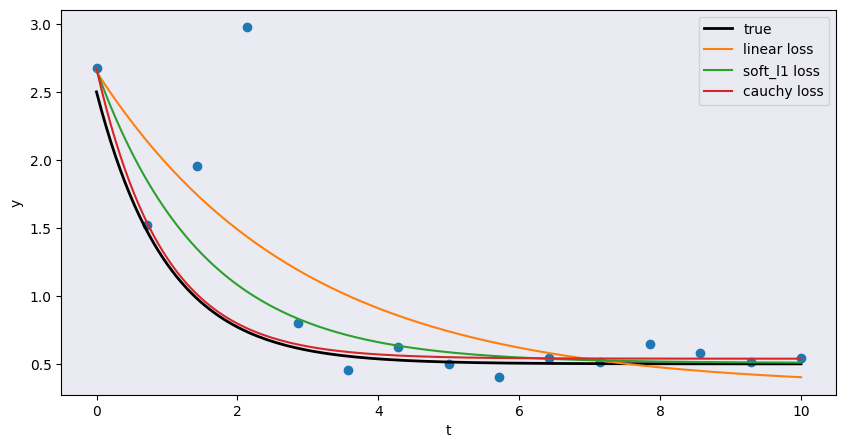

In [8]:
#Plot
plt.figure(figsize=(10, 5))
plt.plot(t_train, y_train, 'o')
plt.plot(t_test, y_true, 'k', linewidth=2, label='true')
plt.plot(t_test, y_lsq, label='linear loss')
plt.plot(t_test, y_soft_l1, label='soft_l1 loss')
plt.plot(t_test, y_log, label='cauchy loss')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

###### scipy.optimize.minimize() 

In [ ]:
#Example 0: Minimize function with parameters
#    -The objective function to be minimize has to have the parameters s.t:
#        -func(x, *arg), func(x, a, b, c), where *arg, a, b, c are parameters

def f(x, a, b, c):
    #scalar values must be returned
    scalar = a*x**2 + b*x + c
    return scalar

scipy.optimize.minimize(f, x0=10, args=(1, 0, 0))

In [ ]:
#Example 1: Minimize fn with scalars. Multiple initial x0
#    -Returns array of minimums
#    -This just performs minimiztion 3 times with different initial guesses.

def f(x, a, b, c):
    return np.sum(a*x**2 + b*x + c)

print(scipy.optimize.minimize(f, x0=[1, 10, 100], args=(1, 1, 1)))

In [ ]:
#Example 1: Minimize fn with input of ARRAYS + x is a scaler
#    -RETURNS A SCALAR VALUE
#    -This 

def f(x, a, b, c):
    return np.sum(a*x**2 + b*x + c)

print(scipy.optimize.minimize(f, x0=10, args=(np.array([1, 2, 3]), np.array([1, 2, 3]), np.array([1, 2, 3]))))

In [ ]:
#Example 1: Minimize fn with input of ARRAYS + scalar. Multiple initial x0
#    -Returns array of minimums

def f(x, a, b, c):
    return np.sum(a*x**2 + b*x + c)

print(scipy.optimize.minimize(f, x0=[10, 10, 10], args=(np.array([1, 2, 3]), 1, 1)))

In [ ]:
#Example 1: Minimize fn with parameters of ARRAYS + x is a scaler
#    -DOESN'T WORK when function doesn't require ARRAYS as input!!!!!!!

def f(x, a, b, c):
    #HERE, it is SUPPOSED to be a scale. So, no array-like arguements.
    return a*x**2 + b*x + c

print(scipy.optimize.minimize(f, x0=10, args=(np.array([1, 2, 3]), np.array([1, 2, 3]), np.array([1, 2, 3]))))

In [ ]:
#Example 3: Rosenbrock function

def f(x):
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

result = scipy.optimize.minimize(f, [2, -1], method="CG")

if result.success:
    fitted_params = result.x
    print("parameters thaaat give min of f = ", fitted_params)
    
elif result.success == False:
    print(result.message)
    
print("\n")
print(result)

In [ ]:
#Example 3: Rosenbrock function with Jacobian + Hessian (BETTER)
#    -miminize() computes jacobian + Hessian if not fed, but works better with jacobian hessian inputted.

def f(x):
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

def hessian(x):
    return np.array(((1 - 4*x[1] + 12*x[0]**2, -4*x[0]), (-4*x[0], 2)))

result = scipy.optimize.minimize(f, [2, -1], method="Newton-CG", jac=jacobian, hess=hessian)

if result.success:
    fitted_params = result.x
    print("parameters that give min of f = ", fitted_params)
    
elif result.success == False:
    print(result.message)
    
print("\n")
print(result)

###### scipy.optimize.minimize() for MULTIPLE variables 

* Bounds don't work well with all minimize() methods
* Search more on how to implemenet bounds

In [67]:
#Example 1: Multiple parameters to fit!!!

#Function
def f(params):
    return params[0]**2 + params[1]**2 + params[2]**2

initial_guess = [1, 1, 1]
result        = minimize(f, initial_guess)

if result.success:
    fitted_params = result.x
    print("parameters that give min of f = ", fitted_params)
    
else:
    raise ValueError(result.message)
    
print("\n")
print(result)

parameters that give min of f =  [-1.66705301e-08 -1.66705302e-08 -1.66705301e-08]


      fun: 8.337197237452974e-16
 hess_inv: array([[ 0.83333334, -0.16666666, -0.16666666],
       [-0.16666666,  0.83333334, -0.16666666],
       [-0.16666666, -0.16666666,  0.83333334]])
      jac: array([-1.84398989e-08, -1.84398992e-08, -1.84398991e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-1.66705301e-08, -1.66705302e-08, -1.66705301e-08])


In [ ]:
#Example 1: Multiple parameters to fit + set BOUNDS

#Function
def f(params):
    return params[0]**2 + params[1]**2 + params[2]**2

initial_guess = [1, 1, 1]
bounds        = [(-2, 2), (-2, 2), (-2, 2)]
result        = minimize(f, initial_guess, bounds=bounds)

if result.success:
    fitted_params = result.x
    print("parameters that give min of f = ", fitted_params)
    
else:
    raise ValueError(result.message)
    
print("\n")
print(result)

In [ ]:
#Example 2: Minimize fn with parameters of ARRAYS + x is an array
#    -RETURNS A SCALAR VALUE
#    -This 

def f(x, a, b, c):
    return np.sum(a*x[0]**2 + b*x[1] + c)

print(scipy.optimize.minimize(f, x0=[1, 1], args=(np.array([1, 2, 3]), np.array([1, 2, 3]),\
                                                  np.array([1, 2, 3]))))

In [ ]:
#Example 2: Minimize fn with parameters of ARRAYS + x is an array + set BOUNDS
#    -RETURNS A SCALAR VALUE
#    -This 

def f(x, a, b, c):
    return np.sum(a*x[0]**2 + b*x[1] + c)

#Bounds
bounds = [(None, None), (None, None)]

print(scipy.optimize.minimize(f, x0=[1, 1], bounds=bounds,\
                              args=(np.array([1, 2, 3]), np.array([1, 2, 3]),np.array([1, 2, 3]))))

###### Least Square Minimization() vs Curve_fit()

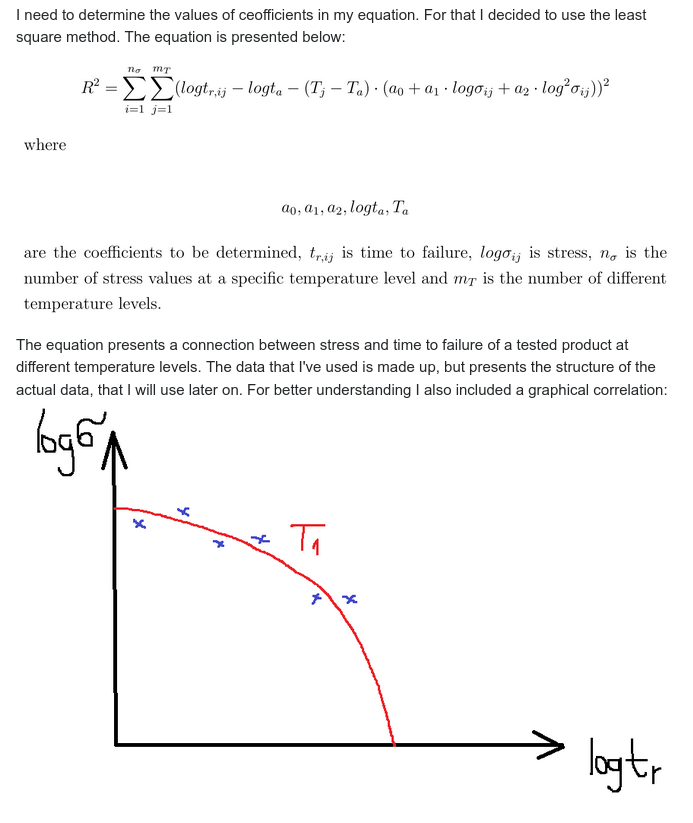

In [6]:
Image(filename="./1_figs/leastsq_example.png")

In [ ]:
#Input Data
temp  = np.array([650, 700, 750, 720, 680]) # temperature
xdata = np.array([500, 525, 540, 534, 490]) # time
ydata = np.array([330, 332, 315, 325, 335]) # stress
T     = temp[0]


plt.plot(xdata,ydata,'*')
plt.xlabel('xdata')
plt.ylabel('ydata')

In [ ]:
#curve_fit()
def func(logS, a_0, a_1, a_2, T_a, logt_a):
    return  logt_a + (T - T_a) * (a_0 + a_1 * logS + a_2 * logS**2)

popt, pcov = scipy.optimize.curve_fit(func, xdata, ydata, p0=(1, 1, 1, 1, 1))
popt

zapis = 'a_0: {0:1.5e}\na_1: {1:1.5e}\na_2: {2:1.5e}\nT_a: {3:1.5e}\nlogt_a: {4:1.5e}'.format(popt[0], popt[1], popt[2], popt[3], popt[4])
print(zapis) 

a_0 = popt[0]
a_1 = popt[1]
a_2 = popt[2]
T_a = popt[3]
logt_a = popt[4]

Fitted parameters = [-5.95682614e+02  2.65404961e-02 -2.63017166e-05  1.21501673e+02
  3.11613895e+05]


Text(0, 0.5, 'y')

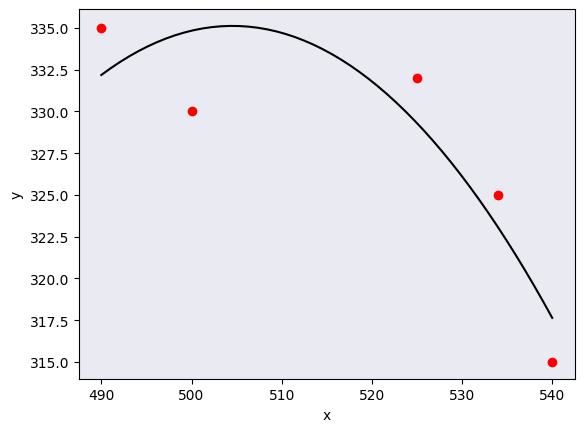

In [26]:
#leastsq()
#    -Below routine LOOKS LIKE it doesn't loop through the summation.
#    -The SUMMING happens as we put in xdata and ydata into leastsq(). 
#        -leastsq() sums up the result from each (x_i, y_i).

def function(parameters, logS):
    a_0, a_1, a_2, T_a, logt_a = parameters
    model = logt_a + (T - T_a) * (a_0 + a_1 * logS + a_2 * logS**2)
    return model

def objective(pars, t_r, logS):
    err =  t_r - function(pars, logS)
    return err

x0   = [ 1.0, 1.0, 1.0, 1.0, 1.0 ] #initial guess of parameters
plsq = scipy.optimize.leastsq(objective, x0, args=(ydata, xdata))

print('Fitted parameters = {0}'.format(plsq[0]))
plt.plot(xdata, ydata, 'ro')
#plot the fitted curve on top
x = np.linspace(min(xdata), max(xdata), 50)
y = function(plsq[0], x)
plt.plot(x, y, 'k-')
plt.xlabel('x')
plt.ylabel('y')


# Integration

###### Sympy - Set sybols some constant real number

In [33]:
A = sympy.Symbol('A')
k = sympy.Symbol('k')
p = sympy.Symbol('p')
x = sympy.Symbol('x')
s = sympy.Symbol('s')

f = integrate(exp(-1*s*x)*A*sin(k*x+p),(x,0,oo))

f = f.subs(A,50)

print(f)

Piecewise((50*sin(p)/(s*(k**2/s**2 + 1)) + 50*cos(p)/(k*(1 + s**2/k**2)), Eq(2*Abs(arg(k)), 0) & (2*Abs(arg(s)) < pi)), (Integral(50*exp(-s*x)*sin(k*x + p), (x, 0, oo)), True))


###### General integration (quad) 

* Bessel function finite integration
$$ I = \int_0^{4.5} J_{2.5}(x) dx $$

In [ ]:
#Define func
bessel = lambda x: scipy.special.jv(2.5, x)
#call quad
result = scipy.integrate.quad(bessel, 0, 0.45)
#Print
print(result)

* Extra arguments
$$ I(a,b) = \int_0^1 ax^2 + b~dx$$

In [34]:
#Define func
def integrand(x, a, b):
    return a*pow(x, 2) + b

#Define arguments
a, b = 2, 1

#call quad
result = scipy.integrate.quad(integrand, 0, 1, args=(a, b))
#print
print(result)

(1.6666666666666667, 1.8503717077085944e-14)


* Inifite limits
$$ E_n(x) = \int_1^{\infty} \frac{e^{-xt}}{t^n} dt$$

In [40]:
#define func
def integrand(t, n, x):
    return np.exp(-x*t) / pow(t, n)

#set args
n, x = 3, 1.0
#Call quad
result = scipy.integrate.quad(integrand, 1, np.inf, args=(n, x))
#print
print(result)

In [ ]:
"""
-Vectorize to compute integral for multiple arguments at once
"""

In [41]:
#Define fn to be vectorized
def exp_int(n, x):
    return scipy.integrate.quad(integrand, 1, np.inf, args=(n,x))[0]

#vectorize
vec_exp_int = np.vectorize(exp_int)

#Compute with vectorize
#    -n=3
#    -x=1, 1.5, 2
vec_exp_int(3, [1, 1.5, 2])

###### Multiple integration

* Double (dblquad) integration using __lambda__
$$ I = \int_{y=0}^{1/2} \int_{x=0}^{1-2y} xy~dxdy = \frac{1}{96} $$

In [ ]:
#using lambda
result = scipy.integrate.dblquad(lambda x, y: x*y, #Function
                                 0, 0.5,           #y limits
                                 lambda x: 0,      #x lower limit
                                 lambda y: 1-2*y)  #x upper limits
#print
print(result)

* Multiple (NQUAD) integrate with inifinite lims
$$ I_n = \int_0^{\infty} \int_1^{\infty} \frac{e^{-xt}}{t^n}~dtdx = \frac{1}{n}$$

In [50]:
#Integrand
N=5
def integrand(t, x):
    y1 = np.exp(-x*t) / pow(t, N)
    return y1

In [ ]:
#nquad
result = scipy.integrate.nquad(integrand, [[1, np.inf], [0, np.inf]])
#print
print(result)

###### Ex 1 - Histogram sum vs Integrate fit func 

In [2]:
#Generate Fake Data
#    -loc gives location of the peak!!!!!!!!!!
data  = np.random.exponential(scale=2.0, size=100000)
data2 = np.random.normal(loc=3.0, scale=0.3, size=15000)

#Bins
#    -Binning size is VERY VERY VERY VERY IMPORTANT!!!!!!
bins  = np.arange(0, 6.1, 0.1)
#bins starting from 1 percentile to 99 percentile, in increments of 0.1% locations
# bins = np.arange(df_tot_list[i]["beta_diff"].quantile([0.0001]).iloc[0], \
#                  df_tot_list[i]["beta_diff"].quantile([0.9999]).iloc[0], 0.01)

#Cetner of each bins - Final x data
bin_centers = np.array([0.5*(bins[i] + bins[i+1]) for i in range(len(bins)-1)])

#array of occurances + corresponding bins
data_entries_1, bins = np.histogram(data, bins=bins)
data_entries_2, bins = np.histogram(data2, bins=bins)

#Add two generated histograms - Final y data
data_entries = data_entries_1 + data_entries_2

In [3]:
#Define function
def fit_func(x, A, beta, B, mu, sigma):
    
    #Define functions here
    first_func  = A*np.exp(-x/beta)
    second_func = B*np.exp(-1.0*(x - mu)**2 / (2*sigma**2))
    final_func  = first_func + second_func
    
    return final_func

In [4]:
#Fit the function to the histogram data
popt, pconv = curve_fit(fit_func, xdata=bin_centers, ydata=data_entries, p0=[20000, 2.0, 2000, 3.0, 0.3])

#Coefficients
print(popt)

[4.99353531e+03 2.00559410e+00 1.94278359e+03 2.99282843e+00
 3.06194189e-01]


In [5]:
#Generate enough x values to make the curves look smooth.
xspace = np.linspace(0, 6, 100)

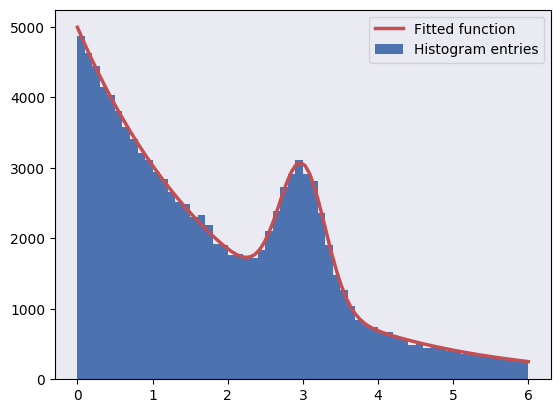

In [6]:
# Plot the histogram and the fitted function.
plt.bar(bin_centers, data_entries, width=bin_centers[1] - bin_centers[0], color='#4C72B0', label='Histogram entries')
plt.plot(xspace, fit_func(xspace, *popt), color='#C44E52', linewidth=2.5, label='Fitted function')

plt.legend()

In [ ]:
"""
-For histogram
    -Sum of all bins: sum(bin_width * bin_height of i)
    
-bin widths may not be the same for all bins!
"""

In [7]:
#Integrate under the curver
intg_result = scipy.integrate.quad(fit_func, bin_centers[0], bin_centers[-1], args=(popt[0], popt[1], popt[2], popt[3], popt[4]))
#print
print(intg_result)

(10744.030084620434, 1.058036449036459e-06)


In [13]:
#Estimate of the absolute ERROR in the result
intg_result[1]

4.2422986998302825e-11

In [8]:
#bin width
bin_width = bin_centers[1] - bin_centers[0]

#Sum counts in histogram to compare
sum_result = np.sum([bin_width * data_entries[i] for i in range(len(data_entries))])
print(sum_result)

10994.500000000002


In [9]:
"""
-Foor finite ragnes
"""

'\n-Foor finite ragnes\n'

In [10]:
#Integrate under the curver in short range 
intg_result = scipy.integrate.quad(fit_func, 2, 4, args=(popt[0], popt[1], popt[2], popt[3], popt[4]))
#print
print(intg_result)

(3821.1229473345165, 4.2422986998302825e-11)


In [11]:
#Sum counts in histogram to compare in short range
boolean_arry_bins = (bin_centers >= 2) & (bin_centers <= 4)
bins_new          = bin_centers[boolean_arry_bins] 

#bin width
bin_width = bin_centers[1] - bin_centers[0]

#subset of histogram
hist_new = data_entries[boolean_arry_bins]

#sum
sum_result = np.sum([bin_width * hist_new[i] for i in range(len(hist_new))])
print(sum_result)

3817.400000000001


# fsolve - find root of non-linear fn 

In [9]:
from scipy.optimize import fsolve
def f(x):
    return x**2 - 4

starting_guess = 3
print(fsolve(f, starting_guess))

[2.]


In [10]:
starting_guess = -3
print(fsolve(f, starting_guess))

[-2.]


# Taylor

In [ ]:
from scipy.interpolate import approximate_taylor_polynomial

x = np.linspace(-10.0, 10.0, num=100)
plt.plot(x, np.sin(x), label="sin curve")

for degree in np.arange(1, 15, step=2):

    sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1)

    plt.plot(x, sin_taylor(x), label=f"degree={degree}")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

plt.tight_layout()
plt.axis([-10, 10, -10, 10])
plt.show()

# ETC 